<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Discovery/blob/main/deepnet_circularfingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circular Fingerprint Based DeepNet Classification Modeling


## Introduction

Extended-connectivity Circular Fingerprint is a topological fingerprint developed particularly for structure-activity modeling. It is flexible, fast while calculations, and has the ability to featurize any number of molecular features. Not only can ECFP be adapted to different use cases, its ability to represent substructures makes analysis more interpretable(Rogers & Hahn, 2010).

## Data loading and Preprocessing



In [1]:
!pip install deepchem
import deepchem as dc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 12.6 MB/s eta 0:00:00


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## Primary dataset

Acquisition of the primary molecular dataset of the human acetylcholinesterase inhibitor was done from ChEMBL database(ID:ChEMBL22).

In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/Part_2_standarizationOfMolecule/StandarizedSmiles_cutOFF800daltonMolecularweight.xlsx')
df.head()

In [ ]:
df['classLabel'].value_counts()

classLabel
0    2330
1    1747
Name: count, dtype: int64

In [ ]:
df['classLabel']=df['IC50'].apply(lambda x: 1 if x<=1000 else 0)
df.head()

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


In [ ]:
df['classLabel'].value_counts()

classLabel
0    2330
1    1747
Name: count, dtype: int64

In [ ]:
df_selected= df[['Smiles', 'classLabel']]
df_selected

,Smiles,classLabel
0,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,1
1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,1
2,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,0
3,Cc1ccc2c(N)c3c(nc2c1)CCCC3,1
4,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,1
...,...,...
4072,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,1
4073,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],0
4074,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],0
4075,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],1


In [ ]:
!pip install rdkit

### Features Generation






Circular fingerprints encode molecular structure by considering the environment around each atom up to a specified radius. This method captures structural information that is useful for tasks such as molecular similarity searching and property prediction. The circular fingerprint featurizer from deepchem featurizer library was adopted, documentation can be found here(DeepChem, 2024):[(Source)](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
import numpy as np

In [ ]:
df.to_csv('inhibitor.csv', index=False)

In [ ]:
dataset_file = 'inhibitor.csv'
task = ['classLabel']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset)
dataset = transformer.transform(dataset)

In [ ]:
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
  dataset=dataset, frac_train=0.7, frac_valid=0.15, frac_test=0.15, random_state=42
)
print(len(train_dataset))
3
print(len(valid_dataset))
1
print(len(test_dataset))

2853
612
612


## Classification modeling with deepnet architectures: ANN, CNN, LSTM, GRU, BiLSTM

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, GRU, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    cohen_kappa_score,
    matthews_corrcoef,
    roc_auc_score,
)

# Define a function to print the confusion matrix as text
def print_confusion_matrix(confusion, model_name):
    print(f"Confusion Matrix - {model_name}:")
    for row in confusion:
        print(row)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.X)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset.y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=42)

# Reshape input data for LSTM and Bi-LSTM models
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid_lstm = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the number of classes
num_classes = 2

# Define deep learning models
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(5),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

lstm_model = Sequential([
    LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

gru_model = Sequential([
    GRU(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

bi_lstm_model = Sequential([
    Bidirectional(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the models
for model in [ann_model, cnn_model, lstm_model, gru_model, bi_lstm_model]:
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train, evaluate, and store results
results = {'Model': [], 'Validation Accuracy': [], 'Test Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [],
           'ROC-AUC': [], 'Cohen\'s Kappa': [], 'MCC': []}
for model_name, model in [('ANN', ann_model), ('CNN', cnn_model), ('LSTM', lstm_model), ('GRU', gru_model), ('Bi-LSTM', bi_lstm_model)]:
    # Define early stopping callback based on recall
    early_stopping = EarlyStopping(monitor='val_recall', mode='max', patience=5, restore_best_weights=True)

    # Train the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_valid_lstm, y_valid),
                            callbacks=[early_stopping])
    else:
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid),
                            callbacks=[early_stopping])

    # Evaluate the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        y_valid_pred_prob = model.predict(X_valid_lstm)
        y_test_pred_prob = model.predict(X_test_lstm)
    else:
        y_valid_pred_prob = model.predict(X_valid)
        y_test_pred_prob = model.predict(X_test)

    y_valid_pred = np.argmax(y_valid_pred_prob, axis=1)
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)

    # Calculate evaluation metrics
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    # Calculate the confusion matrix
    confusion = confusion_matrix(y_test, y_test_pred)

    # Print the confusion matrix as text
    print_confusion_matrix(confusion, model_name)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print("Validation Accuracy:", valid_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("Cohen's Kappa Score:", cohen_kappa)
    print("MCC Score:", mcc)
    print()

    # Store results
    results['Model'].append(model_name)
    results['Validation Accuracy'].append(valid_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)


Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.9650 - accuracy: 0.5678

90/90 [==============================] - 8s 14ms/step - loss: 0.9650 - accuracy: 0.5678 - val_loss: 0.6287 - val_accuracy: 0.7042
Epoch 2/100
89/90 [============================>.] - ETA: 0s - loss: 0.6630 - accuracy: 0.6520

90/90 [==============================] - 1s 10ms/step - loss: 0.6627 - accuracy: 0.6523 - val_loss: 0.5629 - val_accuracy: 0.7859
Epoch 3/100
80/90 [=========================>....] - ETA: 0s - loss: 0.5440 - accuracy: 0.7230

90/90 [==============================] - 1s 5ms/step - loss: 0.5441 - accuracy: 0.7266 - val_loss: 0.5164 - val_accuracy: 0.7974
Epoch 4/100
77/90 [========================>.....] - ETA: 0s - loss: 0.4553 - accuracy: 0.7999

90/90 [==============================] - 0s 4ms/step - loss: 0.4586 - accuracy: 0.7957 - val_loss: 0.4847 - val_accuracy: 0.8056
Epoch 5/100
77/90 [========================>.....] - ETA: 0s - loss: 0.3857 - accuracy: 0.8369

90/90 [==============================] - 0s 4ms/step - loss: 0.3822 - accuracy: 0.8367 - val_loss: 0.4670 - val_accuracy: 0.8056
Epoch 6/100
77/90 [========================>.....] - ETA: 0s - loss: 0.3357 - accuracy: 0.8620

90/90 [==============================] - 0s 4ms/step - loss: 0.3483 - accuracy: 0.8566 - val_loss: 0.4663 - val_accuracy: 0.8137
Epoch 7/100
78/90 [=========================>....] - ETA: 0s - loss: 0.2823 - accuracy: 0.8874

90/90 [==============================] - 0s 4ms/step - loss: 0.2921 - accuracy: 0.8843 - val_loss: 0.4939 - val_accuracy: 0.8186
Epoch 8/100
88/90 [============================>.] - ETA: 0s - loss: 0.2634 - accuracy: 0.9080

90/90 [==============================] - 1s 6ms/step - loss: 0.2628 - accuracy: 0.9082 - val_loss: 0.5079 - val_accuracy: 0.8154
Epoch 9/100
79/90 [=========================>....] - ETA: 0s - loss: 0.2314 - accuracy: 0.9177

90/90 [==============================] - 1s 6ms/step - loss: 0.2272 - accuracy: 0.9190 - val_loss: 0.5473 - val_accuracy: 0.8219
Epoch 10/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2319 - accuracy: 0.9226

90/90 [==============================] - 1s 6ms/step - loss: 0.2294 - accuracy: 0.9222 - val_loss: 0.5395 - val_accuracy: 0.8154
Epoch 11/100
90/90 [==============================] - ETA: 0s - loss: 0.1983 - accuracy: 0.9288

90/90 [==============================] - 1s 6ms/step - loss: 0.1983 - accuracy: 0.9288 - val_loss: 0.5694 - val_accuracy: 0.8219
Epoch 12/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1788 - accuracy: 0.9408

90/90 [==============================] - 1s 6ms/step - loss: 0.1774 - accuracy: 0.9408 - val_loss: 0.6070 - val_accuracy: 0.8154
Epoch 13/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1502 - accuracy: 0.9444

90/90 [==============================] - 1s 6ms/step - loss: 0.1509 - accuracy: 0.9443 - val_loss: 0.6364 - val_accuracy: 0.8203
Epoch 14/100
90/90 [==============================] - ETA: 0s - loss: 0.1445 - accuracy: 0.9478

90/90 [==============================] - 1s 6ms/step - loss: 0.1445 - accuracy: 0.9478 - val_loss: 0.6526 - val_accuracy: 0.8317
Epoch 15/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1312 - accuracy: 0.9550

90/90 [==============================] - 1s 6ms/step - loss: 0.1330 - accuracy: 0.9534 - val_loss: 0.7320 - val_accuracy: 0.8186
Epoch 16/100
89/90 [============================>.] - ETA: 0s - loss: 0.1349 - accuracy: 0.9565

90/90 [==============================] - 0s 4ms/step - loss: 0.1347 - accuracy: 0.9565 - val_loss: 0.7141 - val_accuracy: 0.8203
Epoch 17/100
90/90 [==============================] - ETA: 0s - loss: 0.1208 - accuracy: 0.9590

90/90 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9590 - val_loss: 0.8226 - val_accuracy: 0.8154
Epoch 18/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1237 - accuracy: 0.9564

90/90 [==============================] - 0s 4ms/step - loss: 0.1220 - accuracy: 0.9569 - val_loss: 0.7522 - val_accuracy: 0.8121
Epoch 19/100
79/90 [=========================>....] - ETA: 0s - loss: 0.1178 - accuracy: 0.9597

90/90 [==============================] - 0s 4ms/step - loss: 0.1171 - accuracy: 0.9604 - val_loss: 0.8092 - val_accuracy: 0.8203
Epoch 20/100
79/90 [=========================>....] - ETA: 0s - loss: 0.1049 - accuracy: 0.9632

90/90 [==============================] - 0s 4ms/step - loss: 0.1095 - accuracy: 0.9604 - val_loss: 0.8551 - val_accuracy: 0.8186
Epoch 21/100
79/90 [=========================>....] - ETA: 0s - loss: 0.0972 - accuracy: 0.9703

90/90 [==============================] - 0s 4ms/step - loss: 0.0983 - accuracy: 0.9702 - val_loss: 0.8868 - val_accuracy: 0.8105
Epoch 22/100
79/90 [=========================>....] - ETA: 0s - loss: 0.0869 - accuracy: 0.9695

90/90 [==============================] - 0s 4ms/step - loss: 0.0903 - accuracy: 0.9709 - val_loss: 0.8984 - val_accuracy: 0.8137
Epoch 23/100
77/90 [========================>.....] - ETA: 0s - loss: 0.0810 - accuracy: 0.9724

90/90 [==============================] - 0s 4ms/step - loss: 0.0872 - accuracy: 0.9702 - val_loss: 0.9361 - val_accuracy: 0.8121
Epoch 24/100
76/90 [========================>.....] - ETA: 0s - loss: 0.0746 - accuracy: 0.9762

90/90 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9734 - val_loss: 1.0125 - val_accuracy: 0.8252
Epoch 25/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0816 - accuracy: 0.9730

90/90 [==============================] - 0s 4ms/step - loss: 0.0792 - accuracy: 0.9734 - val_loss: 1.0112 - val_accuracy: 0.8170
Epoch 26/100
90/90 [==============================] - ETA: 0s - loss: 0.0848 - accuracy: 0.9706

90/90 [==============================] - 0s 4ms/step - loss: 0.0848 - accuracy: 0.9706 - val_loss: 0.9969 - val_accuracy: 0.8088
Epoch 27/100
76/90 [========================>.....] - ETA: 0s - loss: 0.0816 - accuracy: 0.9749

90/90 [==============================] - 0s 4ms/step - loss: 0.0832 - accuracy: 0.9737 - val_loss: 0.9837 - val_accuracy: 0.8154
Epoch 28/100
78/90 [=========================>....] - ETA: 0s - loss: 0.0743 - accuracy: 0.9748

90/90 [==============================] - 0s 4ms/step - loss: 0.0812 - accuracy: 0.9751 - val_loss: 1.0583 - val_accuracy: 0.8154
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.9797

90/90 [==============================] - 0s 4ms/step - loss: 0.0671 - accuracy: 0.9797 - val_loss: 1.0820 - val_accuracy: 0.7990
Epoch 30/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0703 - accuracy: 0.9801

90/90 [==============================] - 0s 4ms/step - loss: 0.0699 - accuracy: 0.9793 - val_loss: 1.1697 - val_accuracy: 0.8137
Epoch 31/100
89/90 [============================>.] - ETA: 0s - loss: 0.0627 - accuracy: 0.9793

90/90 [==============================] - 0s 4ms/step - loss: 0.0631 - accuracy: 0.9790 - val_loss: 1.2123 - val_accuracy: 0.8170
Epoch 32/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0596 - accuracy: 0.9824

90/90 [==============================] - 0s 4ms/step - loss: 0.0644 - accuracy: 0.9807 - val_loss: 1.2376 - val_accuracy: 0.8137
Epoch 33/100
79/90 [=========================>....] - ETA: 0s - loss: 0.0592 - accuracy: 0.9794

90/90 [==============================] - 0s 4ms/step - loss: 0.0660 - accuracy: 0.9797 - val_loss: 1.1873 - val_accuracy: 0.8137
Epoch 34/100
90/90 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9800

90/90 [==============================] - 0s 4ms/step - loss: 0.0633 - accuracy: 0.9800 - val_loss: 1.2344 - val_accuracy: 0.8203
Epoch 35/100
78/90 [=========================>....] - ETA: 0s - loss: 0.0614 - accuracy: 0.9816

90/90 [==============================] - 0s 4ms/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 1.2794 - val_accuracy: 0.8154
Epoch 36/100
76/90 [========================>.....] - ETA: 0s - loss: 0.0591 - accuracy: 0.9811

90/90 [==============================] - 0s 4ms/step - loss: 0.0595 - accuracy: 0.9807 - val_loss: 1.2741 - val_accuracy: 0.8088
Epoch 37/100
76/90 [========================>.....] - ETA: 0s - loss: 0.0688 - accuracy: 0.9794

90/90 [==============================] - 0s 4ms/step - loss: 0.0686 - accuracy: 0.9804 - val_loss: 1.2165 - val_accuracy: 0.8154
Epoch 38/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0570 - accuracy: 0.9801

90/90 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 0.9804 - val_loss: 1.2720 - val_accuracy: 0.8137
Epoch 39/100
77/90 [========================>.....] - ETA: 0s - loss: 0.0616 - accuracy: 0.9793

90/90 [==============================] - 0s 4ms/step - loss: 0.0583 - accuracy: 0.9800 - val_loss: 1.2997 - val_accuracy: 0.8203
Epoch 40/100
78/90 [=========================>....] - ETA: 0s - loss: 0.0505 - accuracy: 0.9800

90/90 [==============================] - 0s 4ms/step - loss: 0.0497 - accuracy: 0.9804 - val_loss: 1.4319 - val_accuracy: 0.8105
Epoch 41/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0470 - accuracy: 0.9805

90/90 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.9814 - val_loss: 1.5688 - val_accuracy: 0.8121
Epoch 42/100
83/90 [==========================>...] - ETA: 0s - loss: 0.0566 - accuracy: 0.9816

90/90 [==============================] - 1s 6ms/step - loss: 0.0565 - accuracy: 0.9807 - val_loss: 1.4884 - val_accuracy: 0.8105
Epoch 43/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0624 - accuracy: 0.9801

90/90 [==============================] - 1s 6ms/step - loss: 0.0586 - accuracy: 0.9811 - val_loss: 1.3154 - val_accuracy: 0.8056
Epoch 44/100
85/90 [===========================>..] - ETA: 0s - loss: 0.0576 - accuracy: 0.9809

90/90 [==============================] - 1s 6ms/step - loss: 0.0569 - accuracy: 0.9814 - val_loss: 1.4137 - val_accuracy: 0.8105
Epoch 45/100
79/90 [=========================>....] - ETA: 0s - loss: 0.0343 - accuracy: 0.9877

90/90 [==============================] - 1s 6ms/step - loss: 0.0351 - accuracy: 0.9877 - val_loss: 1.7427 - val_accuracy: 0.8007
Epoch 46/100
90/90 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9846

90/90 [==============================] - 1s 6ms/step - loss: 0.0551 - accuracy: 0.9846 - val_loss: 1.5461 - val_accuracy: 0.8105
Epoch 47/100
86/90 [===========================>..] - ETA: 0s - loss: 0.0404 - accuracy: 0.9862

90/90 [==============================] - 1s 6ms/step - loss: 0.0437 - accuracy: 0.9856 - val_loss: 1.5916 - val_accuracy: 0.8072
Epoch 48/100
82/90 [==========================>...] - ETA: 0s - loss: 0.0520 - accuracy: 0.9817

90/90 [==============================] - 1s 6ms/step - loss: 0.0531 - accuracy: 0.9814 - val_loss: 1.4528 - val_accuracy: 0.8154
Epoch 49/100
86/90 [===========================>..] - ETA: 0s - loss: 0.0482 - accuracy: 0.9855

90/90 [==============================] - 1s 6ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 1.6513 - val_accuracy: 0.8219
Epoch 50/100
83/90 [==========================>...] - ETA: 0s - loss: 0.0512 - accuracy: 0.9838

90/90 [==============================] - 0s 5ms/step - loss: 0.0504 - accuracy: 0.9839 - val_loss: 1.5901 - val_accuracy: 0.8088
Epoch 51/100
77/90 [========================>.....] - ETA: 0s - loss: 0.0416 - accuracy: 0.9846

90/90 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9846 - val_loss: 1.7637 - val_accuracy: 0.8121
Epoch 52/100
90/90 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9849

90/90 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.9849 - val_loss: 1.5845 - val_accuracy: 0.8137
Epoch 53/100
79/90 [=========================>....] - ETA: 0s - loss: 0.0307 - accuracy: 0.9881

90/90 [==============================] - 0s 4ms/step - loss: 0.0305 - accuracy: 0.9881 - val_loss: 1.9595 - val_accuracy: 0.8105
Epoch 54/100
77/90 [========================>.....] - ETA: 0s - loss: 0.0455 - accuracy: 0.9846

90/90 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9849 - val_loss: 1.7431 - val_accuracy: 0.8072
Epoch 55/100
89/90 [============================>.] - ETA: 0s - loss: 0.0575 - accuracy: 0.9842

90/90 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9842 - val_loss: 1.4756 - val_accuracy: 0.8203
Epoch 56/100
78/90 [=========================>....] - ETA: 0s - loss: 0.0429 - accuracy: 0.9844

90/90 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9856 - val_loss: 1.6930 - val_accuracy: 0.8186
Epoch 57/100
88/90 [============================>.] - ETA: 0s - loss: 0.0436 - accuracy: 0.9844

90/90 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.9842 - val_loss: 1.6600 - val_accuracy: 0.8121
Epoch 58/100
79/90 [=========================>....] - ETA: 0s - loss: 0.0404 - accuracy: 0.9850

90/90 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.9849 - val_loss: 1.8559 - val_accuracy: 0.8056
Epoch 59/100
79/90 [=========================>....] - ETA: 0s - loss: 0.0422 - accuracy: 0.9850

90/90 [==============================] - 0s 4ms/step - loss: 0.0393 - accuracy: 0.9863 - val_loss: 1.8136 - val_accuracy: 0.8072
Epoch 60/100
77/90 [========================>.....] - ETA: 0s - loss: 0.0487 - accuracy: 0.9834

90/90 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9828 - val_loss: 1.6828 - val_accuracy: 0.7990
Epoch 61/100
78/90 [=========================>....] - ETA: 0s - loss: 0.0365 - accuracy: 0.9864

90/90 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9867 - val_loss: 1.9029 - val_accuracy: 0.8007
Epoch 62/100
77/90 [========================>.....] - ETA: 0s - loss: 0.0533 - accuracy: 0.9817

90/90 [==============================] - 0s 4ms/step - loss: 0.0510 - accuracy: 0.9821 - val_loss: 1.5729 - val_accuracy: 0.8088
Epoch 63/100
76/90 [========================>.....] - ETA: 0s - loss: 0.0467 - accuracy: 0.9860

90/90 [==============================] - 0s 4ms/step - loss: 0.0450 - accuracy: 0.9856 - val_loss: 1.9157 - val_accuracy: 0.8121
Epoch 64/100
90/90 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9856

90/90 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9856 - val_loss: 1.8484 - val_accuracy: 0.8137
Epoch 65/100
76/90 [========================>.....] - ETA: 0s - loss: 0.0371 - accuracy: 0.9868

90/90 [==============================] - 0s 4ms/step - loss: 0.0359 - accuracy: 0.9867 - val_loss: 1.9078 - val_accuracy: 0.8170
Epoch 66/100
79/90 [=========================>....] - ETA: 0s - loss: 0.0408 - accuracy: 0.9838

90/90 [==============================] - 0s 4ms/step - loss: 0.0407 - accuracy: 0.9839 - val_loss: 1.9672 - val_accuracy: 0.8072
Epoch 67/100
90/90 [==============================] - ETA: 0s - loss: 0.0339 - accuracy: 0.9884

90/90 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 0.9884 - val_loss: 1.9112 - val_accuracy: 0.8121
Epoch 68/100
90/90 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 0.9912

90/90 [==============================] - 0s 4ms/step - loss: 0.0289 - accuracy: 0.9912 - val_loss: 2.3086 - val_accuracy: 0.8088
Epoch 69/100
76/90 [========================>.....] - ETA: 0s - loss: 0.0467 - accuracy: 0.9897

90/90 [==============================] - 0s 4ms/step - loss: 0.0496 - accuracy: 0.9881 - val_loss: 1.8528 - val_accuracy: 0.8072
Epoch 70/100
76/90 [========================>.....] - ETA: 0s - loss: 0.0256 - accuracy: 0.9893

90/90 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9884 - val_loss: 1.9804 - val_accuracy: 0.8072
Epoch 71/100
77/90 [========================>.....] - ETA: 0s - loss: 0.0300 - accuracy: 0.9890

90/90 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9888 - val_loss: 2.1077 - val_accuracy: 0.8088
Epoch 72/100
78/90 [=========================>....] - ETA: 0s - loss: 0.0313 - accuracy: 0.9880

90/90 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9870 - val_loss: 2.1817 - val_accuracy: 0.8056
Epoch 73/100
90/90 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9895

90/90 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9895 - val_loss: 2.4179 - val_accuracy: 0.8056
Epoch 74/100
78/90 [=========================>....] - ETA: 0s - loss: 0.0345 - accuracy: 0.9880

90/90 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9881 - val_loss: 2.2771 - val_accuracy: 0.8137
Epoch 75/100
87/90 [============================>.] - ETA: 0s - loss: 0.0474 - accuracy: 0.9864

90/90 [==============================] - 0s 5ms/step - loss: 0.0470 - accuracy: 0.9867 - val_loss: 1.9023 - val_accuracy: 0.8137
Epoch 76/100
87/90 [============================>.] - ETA: 0s - loss: 0.0354 - accuracy: 0.9867

90/90 [==============================] - 1s 6ms/step - loss: 0.0355 - accuracy: 0.9870 - val_loss: 2.1966 - val_accuracy: 0.8039
Epoch 77/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0363 - accuracy: 0.9883

90/90 [==============================] - 1s 6ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 2.2942 - val_accuracy: 0.8072
Epoch 78/100
87/90 [============================>.] - ETA: 0s - loss: 0.0308 - accuracy: 0.9907

90/90 [==============================] - 1s 6ms/step - loss: 0.0301 - accuracy: 0.9909 - val_loss: 2.3241 - val_accuracy: 0.8072
Epoch 79/100
89/90 [============================>.] - ETA: 0s - loss: 0.0294 - accuracy: 0.9874

90/90 [==============================] - 1s 6ms/step - loss: 0.0293 - accuracy: 0.9874 - val_loss: 2.4688 - val_accuracy: 0.8072
Epoch 80/100
83/90 [==========================>...] - ETA: 0s - loss: 0.0289 - accuracy: 0.9872

90/90 [==============================] - 1s 6ms/step - loss: 0.0288 - accuracy: 0.9867 - val_loss: 2.5263 - val_accuracy: 0.8023
Epoch 81/100
89/90 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9912

90/90 [==============================] - 1s 6ms/step - loss: 0.0231 - accuracy: 0.9912 - val_loss: 2.6128 - val_accuracy: 0.8023
Epoch 82/100
86/90 [===========================>..] - ETA: 0s - loss: 0.0404 - accuracy: 0.9891

90/90 [==============================] - 1s 6ms/step - loss: 0.0412 - accuracy: 0.9888 - val_loss: 2.1040 - val_accuracy: 0.8007
Epoch 83/100
86/90 [===========================>..] - ETA: 0s - loss: 0.0325 - accuracy: 0.9884

90/90 [==============================] - 1s 7ms/step - loss: 0.0325 - accuracy: 0.9884 - val_loss: 2.3451 - val_accuracy: 0.8056
Epoch 84/100
89/90 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9895

90/90 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9895 - val_loss: 2.4964 - val_accuracy: 0.8056
Epoch 85/100
89/90 [============================>.] - ETA: 0s - loss: 0.0306 - accuracy: 0.9905

90/90 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 2.5765 - val_accuracy: 0.8023
Epoch 86/100
85/90 [===========================>..] - ETA: 0s - loss: 0.0383 - accuracy: 0.9864

90/90 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.9867 - val_loss: 2.1563 - val_accuracy: 0.8121
Epoch 87/100
78/90 [=========================>....] - ETA: 0s - loss: 0.0273 - accuracy: 0.9888

90/90 [==============================] - 0s 4ms/step - loss: 0.0300 - accuracy: 0.9888 - val_loss: 2.4257 - val_accuracy: 0.8121
Epoch 88/100
88/90 [============================>.] - ETA: 0s - loss: 0.0457 - accuracy: 0.9833

90/90 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.9832 - val_loss: 1.9566 - val_accuracy: 0.8105
Epoch 89/100
77/90 [========================>.....] - ETA: 0s - loss: 0.0322 - accuracy: 0.9878

90/90 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9888 - val_loss: 2.7480 - val_accuracy: 0.8186
Epoch 90/100
79/90 [=========================>....] - ETA: 0s - loss: 0.0263 - accuracy: 0.9905

90/90 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 2.8811 - val_accuracy: 0.8121
Epoch 91/100
89/90 [============================>.] - ETA: 0s - loss: 0.0381 - accuracy: 0.9870

90/90 [==============================] - 0s 4ms/step - loss: 0.0380 - accuracy: 0.9870 - val_loss: 2.5910 - val_accuracy: 0.8039
Epoch 92/100
77/90 [========================>.....] - ETA: 0s - loss: 0.0250 - accuracy: 0.9903

90/90 [==============================] - 0s 4ms/step - loss: 0.0239 - accuracy: 0.9909 - val_loss: 2.8831 - val_accuracy: 0.8039
Epoch 93/100
79/90 [=========================>....] - ETA: 0s - loss: 0.0379 - accuracy: 0.9869

90/90 [==============================] - 0s 4ms/step - loss: 0.0366 - accuracy: 0.9874 - val_loss: 2.3672 - val_accuracy: 0.8088
Epoch 94/100
77/90 [========================>.....] - ETA: 0s - loss: 0.0323 - accuracy: 0.9878

90/90 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.9881 - val_loss: 2.4083 - val_accuracy: 0.8088
Epoch 95/100
77/90 [========================>.....] - ETA: 0s - loss: 0.0275 - accuracy: 0.9894

90/90 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9895 - val_loss: 2.7666 - val_accuracy: 0.8023
Epoch 96/100
88/90 [============================>.] - ETA: 0s - loss: 0.0263 - accuracy: 0.9904

90/90 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9905 - val_loss: 2.9993 - val_accuracy: 0.8072
Epoch 97/100
78/90 [=========================>....] - ETA: 0s - loss: 0.0225 - accuracy: 0.9916

90/90 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9912 - val_loss: 2.9964 - val_accuracy: 0.8023
Epoch 98/100
78/90 [=========================>....] - ETA: 0s - loss: 0.0318 - accuracy: 0.9900

90/90 [==============================] - 0s 4ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 2.5097 - val_accuracy: 0.8072
Epoch 99/100
90/90 [==============================] - ETA: 0s - loss: 0.0314 - accuracy: 0.9891

90/90 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9891 - val_loss: 2.3618 - val_accuracy: 0.7908
Epoch 100/100
78/90 [=========================>....] - ETA: 0s - loss: 0.0315 - accuracy: 0.9864

20/20 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[303  61]
[ 41 207]
Model: ANN
Validation Accuracy: 0.7990196078431373
Test Accuracy: 0.8333333333333334
Precision: 0.7723880597014925
Recall: 0.8346774193548387
F1 Score: 0.8023255813953488
ROC-AUC Score: 0.8335475008862107
Cohen's Kappa Score: 0.6586315513168256
MCC Score: 0.6601119587968709

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.7041 - accuracy: 0.5356

90/90 [==============================] - 5s 19ms/step - loss: 0.7041 - accuracy: 0.5356 - val_loss: 0.6803 - val_accuracy: 0.5948
Epoch 2/100
88/90 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5330

90/90 [==============================] - 1s 12ms/step - loss: 0.6910 - accuracy: 0.5349 - val_loss: 0.6748 - val_accuracy: 0.5948
Epoch 3/100
87/90 [============================>.] - ETA: 0s - loss: 0.6832 - accuracy: 0.5557

90/90 [==============================] - 1s 11ms/step - loss: 0.6836 - accuracy: 0.5552 - val_loss: 0.6688 - val_accuracy: 0.5948
Epoch 4/100
84/90 [===========================>..] - ETA: 0s - loss: 0.6747 - accuracy: 0.5618

90/90 [==============================] - 1s 10ms/step - loss: 0.6759 - accuracy: 0.5587 - val_loss: 0.6614 - val_accuracy: 0.5948
Epoch 5/100
84/90 [===========================>..] - ETA: 0s - loss: 0.6700 - accuracy: 0.5502

90/90 [==============================] - 1s 9ms/step - loss: 0.6678 - accuracy: 0.5521 - val_loss: 0.6509 - val_accuracy: 0.5948
Epoch 6/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6636 - accuracy: 0.5721

90/90 [==============================] - 1s 10ms/step - loss: 0.6666 - accuracy: 0.5678 - val_loss: 0.6494 - val_accuracy: 0.5948
Epoch 7/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6596 - accuracy: 0.5985

90/90 [==============================] - 1s 10ms/step - loss: 0.6594 - accuracy: 0.6001 - val_loss: 0.6667 - val_accuracy: 0.5882
Epoch 8/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6501 - accuracy: 0.6184

90/90 [==============================] - 1s 10ms/step - loss: 0.6505 - accuracy: 0.6186 - val_loss: 0.6547 - val_accuracy: 0.6324
Epoch 9/100
90/90 [==============================] - ETA: 0s - loss: 0.6527 - accuracy: 0.6250

90/90 [==============================] - 1s 10ms/step - loss: 0.6527 - accuracy: 0.6250 - val_loss: 0.6468 - val_accuracy: 0.6438
Epoch 10/100
84/90 [===========================>..] - ETA: 0s - loss: 0.6490 - accuracy: 0.6280

90/90 [==============================] - 1s 10ms/step - loss: 0.6470 - accuracy: 0.6309 - val_loss: 0.6436 - val_accuracy: 0.6389
Epoch 11/100
84/90 [===========================>..] - ETA: 0s - loss: 0.6387 - accuracy: 0.6432

90/90 [==============================] - 1s 10ms/step - loss: 0.6373 - accuracy: 0.6435 - val_loss: 0.6296 - val_accuracy: 0.6601
Epoch 12/100
84/90 [===========================>..] - ETA: 0s - loss: 0.6279 - accuracy: 0.6674

90/90 [==============================] - 1s 10ms/step - loss: 0.6263 - accuracy: 0.6660 - val_loss: 0.6251 - val_accuracy: 0.6650
Epoch 13/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6211 - accuracy: 0.6717

90/90 [==============================] - 1s 10ms/step - loss: 0.6193 - accuracy: 0.6747 - val_loss: 0.6070 - val_accuracy: 0.6797
Epoch 14/100
84/90 [===========================>..] - ETA: 0s - loss: 0.6106 - accuracy: 0.6793

90/90 [==============================] - 1s 9ms/step - loss: 0.6097 - accuracy: 0.6807 - val_loss: 0.6141 - val_accuracy: 0.6520
Epoch 15/100
88/90 [============================>.] - ETA: 0s - loss: 0.5953 - accuracy: 0.6939

90/90 [==============================] - 1s 11ms/step - loss: 0.5961 - accuracy: 0.6926 - val_loss: 0.6161 - val_accuracy: 0.6601
Epoch 16/100
89/90 [============================>.] - ETA: 0s - loss: 0.5920 - accuracy: 0.6970

90/90 [==============================] - 1s 11ms/step - loss: 0.5918 - accuracy: 0.6972 - val_loss: 0.5815 - val_accuracy: 0.7042
Epoch 17/100
89/90 [============================>.] - ETA: 0s - loss: 0.5815 - accuracy: 0.7072

90/90 [==============================] - 1s 11ms/step - loss: 0.5814 - accuracy: 0.7070 - val_loss: 0.5986 - val_accuracy: 0.6797
Epoch 18/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5763 - accuracy: 0.7063

90/90 [==============================] - 1s 11ms/step - loss: 0.5761 - accuracy: 0.7052 - val_loss: 0.5738 - val_accuracy: 0.7108
Epoch 19/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5690 - accuracy: 0.7188

90/90 [==============================] - 1s 10ms/step - loss: 0.5698 - accuracy: 0.7185 - val_loss: 0.5755 - val_accuracy: 0.7042
Epoch 20/100
90/90 [==============================] - ETA: 0s - loss: 0.5629 - accuracy: 0.7322

90/90 [==============================] - 1s 9ms/step - loss: 0.5629 - accuracy: 0.7322 - val_loss: 0.5877 - val_accuracy: 0.6961
Epoch 21/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5553 - accuracy: 0.7283

90/90 [==============================] - 1s 9ms/step - loss: 0.5570 - accuracy: 0.7263 - val_loss: 0.5676 - val_accuracy: 0.7255
Epoch 22/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5665 - accuracy: 0.7210

90/90 [==============================] - 1s 10ms/step - loss: 0.5661 - accuracy: 0.7185 - val_loss: 0.5691 - val_accuracy: 0.6993
Epoch 23/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5300 - accuracy: 0.7567

90/90 [==============================] - 1s 9ms/step - loss: 0.5287 - accuracy: 0.7581 - val_loss: 0.5698 - val_accuracy: 0.7075
Epoch 24/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5286 - accuracy: 0.7478

90/90 [==============================] - 1s 9ms/step - loss: 0.5252 - accuracy: 0.7501 - val_loss: 0.5689 - val_accuracy: 0.7092
Epoch 25/100
83/90 [==========================>...] - ETA: 0s - loss: 0.5235 - accuracy: 0.7572

90/90 [==============================] - 1s 9ms/step - loss: 0.5225 - accuracy: 0.7557 - val_loss: 0.5746 - val_accuracy: 0.7075
Epoch 26/100
90/90 [==============================] - ETA: 0s - loss: 0.5173 - accuracy: 0.7539

90/90 [==============================] - 1s 9ms/step - loss: 0.5173 - accuracy: 0.7539 - val_loss: 0.5550 - val_accuracy: 0.7173
Epoch 27/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5143 - accuracy: 0.7588

90/90 [==============================] - 1s 10ms/step - loss: 0.5132 - accuracy: 0.7581 - val_loss: 0.5879 - val_accuracy: 0.7173
Epoch 28/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5036 - accuracy: 0.7682

90/90 [==============================] - 1s 9ms/step - loss: 0.5022 - accuracy: 0.7683 - val_loss: 0.5661 - val_accuracy: 0.7124
Epoch 29/100
89/90 [============================>.] - ETA: 0s - loss: 0.5176 - accuracy: 0.7658

90/90 [==============================] - 1s 9ms/step - loss: 0.5173 - accuracy: 0.7659 - val_loss: 0.5438 - val_accuracy: 0.7255
Epoch 30/100
90/90 [==============================] - ETA: 0s - loss: 0.4912 - accuracy: 0.7799

90/90 [==============================] - 1s 9ms/step - loss: 0.4912 - accuracy: 0.7799 - val_loss: 0.5497 - val_accuracy: 0.7320
Epoch 31/100
87/90 [============================>.] - ETA: 0s - loss: 0.4794 - accuracy: 0.7798

90/90 [==============================] - 2s 19ms/step - loss: 0.4815 - accuracy: 0.7795 - val_loss: 0.5950 - val_accuracy: 0.6993
Epoch 32/100
88/90 [============================>.] - ETA: 0s - loss: 0.4811 - accuracy: 0.7823

90/90 [==============================] - 1s 14ms/step - loss: 0.4801 - accuracy: 0.7827 - val_loss: 0.5677 - val_accuracy: 0.7190
Epoch 33/100
89/90 [============================>.] - ETA: 0s - loss: 0.4652 - accuracy: 0.7918

90/90 [==============================] - 1s 15ms/step - loss: 0.4650 - accuracy: 0.7918 - val_loss: 0.5603 - val_accuracy: 0.7402
Epoch 34/100
88/90 [============================>.] - ETA: 0s - loss: 0.4906 - accuracy: 0.7653

90/90 [==============================] - 1s 12ms/step - loss: 0.4886 - accuracy: 0.7669 - val_loss: 0.5808 - val_accuracy: 0.7353
Epoch 35/100
89/90 [============================>.] - ETA: 0s - loss: 0.4814 - accuracy: 0.7879

90/90 [==============================] - 1s 9ms/step - loss: 0.4809 - accuracy: 0.7883 - val_loss: 0.5709 - val_accuracy: 0.7124
Epoch 36/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4747 - accuracy: 0.7906

90/90 [==============================] - 1s 9ms/step - loss: 0.4767 - accuracy: 0.7862 - val_loss: 0.5385 - val_accuracy: 0.7369
Epoch 37/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4705 - accuracy: 0.7849

90/90 [==============================] - 1s 9ms/step - loss: 0.4729 - accuracy: 0.7809 - val_loss: 0.5536 - val_accuracy: 0.7598
Epoch 38/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4612 - accuracy: 0.7920

90/90 [==============================] - 1s 10ms/step - loss: 0.4595 - accuracy: 0.7946 - val_loss: 0.5532 - val_accuracy: 0.7467
Epoch 39/100
89/90 [============================>.] - ETA: 0s - loss: 0.4314 - accuracy: 0.8132

90/90 [==============================] - 1s 9ms/step - loss: 0.4311 - accuracy: 0.8135 - val_loss: 0.5821 - val_accuracy: 0.7353
Epoch 40/100
88/90 [============================>.] - ETA: 0s - loss: 0.4638 - accuracy: 0.7976

90/90 [==============================] - 1s 9ms/step - loss: 0.4631 - accuracy: 0.7981 - val_loss: 0.5484 - val_accuracy: 0.7418
Epoch 41/100
89/90 [============================>.] - ETA: 0s - loss: 0.4425 - accuracy: 0.8037

90/90 [==============================] - 1s 10ms/step - loss: 0.4421 - accuracy: 0.8037 - val_loss: 0.5614 - val_accuracy: 0.7386
Epoch 42/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4386 - accuracy: 0.8073

90/90 [==============================] - 1s 10ms/step - loss: 0.4382 - accuracy: 0.8076 - val_loss: 0.5365 - val_accuracy: 0.7435
Epoch 43/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4482 - accuracy: 0.8022

90/90 [==============================] - 1s 10ms/step - loss: 0.4484 - accuracy: 0.8027 - val_loss: 0.5647 - val_accuracy: 0.7467
Epoch 44/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4241 - accuracy: 0.8285

90/90 [==============================] - 1s 9ms/step - loss: 0.4257 - accuracy: 0.8240 - val_loss: 0.5575 - val_accuracy: 0.7467
Epoch 45/100
87/90 [============================>.] - ETA: 0s - loss: 0.4895 - accuracy: 0.7737

90/90 [==============================] - 1s 10ms/step - loss: 0.4872 - accuracy: 0.7760 - val_loss: 0.5838 - val_accuracy: 0.6830
Epoch 46/100
90/90 [==============================] - ETA: 0s - loss: 0.4286 - accuracy: 0.8223

90/90 [==============================] - 1s 11ms/step - loss: 0.4286 - accuracy: 0.8223 - val_loss: 0.5471 - val_accuracy: 0.7386
Epoch 47/100
88/90 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.8054

90/90 [==============================] - 1s 11ms/step - loss: 0.4467 - accuracy: 0.8048 - val_loss: 0.6000 - val_accuracy: 0.7092
Epoch 48/100
87/90 [============================>.] - ETA: 0s - loss: 0.4368 - accuracy: 0.8071

90/90 [==============================] - 1s 11ms/step - loss: 0.4384 - accuracy: 0.8065 - val_loss: 0.5639 - val_accuracy: 0.7320
Epoch 49/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4233 - accuracy: 0.8147

90/90 [==============================] - 1s 10ms/step - loss: 0.4208 - accuracy: 0.8181 - val_loss: 0.5826 - val_accuracy: 0.7435
Epoch 50/100
90/90 [==============================] - ETA: 0s - loss: 0.4253 - accuracy: 0.8118

90/90 [==============================] - 1s 9ms/step - loss: 0.4253 - accuracy: 0.8118 - val_loss: 0.5929 - val_accuracy: 0.7402
Epoch 51/100
90/90 [==============================] - ETA: 0s - loss: 0.4144 - accuracy: 0.8268

90/90 [==============================] - 1s 9ms/step - loss: 0.4144 - accuracy: 0.8268 - val_loss: 0.5579 - val_accuracy: 0.7549
Epoch 52/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4089 - accuracy: 0.8237

90/90 [==============================] - 1s 10ms/step - loss: 0.4051 - accuracy: 0.8254 - val_loss: 0.6352 - val_accuracy: 0.7418
Epoch 53/100
90/90 [==============================] - ETA: 0s - loss: 0.4299 - accuracy: 0.8167

90/90 [==============================] - 1s 9ms/step - loss: 0.4299 - accuracy: 0.8167 - val_loss: 0.5970 - val_accuracy: 0.7500
Epoch 54/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4075 - accuracy: 0.8251

90/90 [==============================] - 1s 10ms/step - loss: 0.4068 - accuracy: 0.8268 - val_loss: 0.5673 - val_accuracy: 0.7516
Epoch 55/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3927 - accuracy: 0.8464

90/90 [==============================] - 1s 10ms/step - loss: 0.3962 - accuracy: 0.8430 - val_loss: 0.5478 - val_accuracy: 0.7549
Epoch 56/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3950 - accuracy: 0.8356

90/90 [==============================] - 1s 10ms/step - loss: 0.3996 - accuracy: 0.8321 - val_loss: 0.5646 - val_accuracy: 0.7369
Epoch 57/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3856 - accuracy: 0.8434

90/90 [==============================] - 1s 9ms/step - loss: 0.3885 - accuracy: 0.8423 - val_loss: 0.6293 - val_accuracy: 0.7190
Epoch 58/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3767 - accuracy: 0.8419

90/90 [==============================] - 1s 10ms/step - loss: 0.3808 - accuracy: 0.8398 - val_loss: 0.6129 - val_accuracy: 0.7418
Epoch 59/100
89/90 [============================>.] - ETA: 0s - loss: 0.3841 - accuracy: 0.8448

90/90 [==============================] - 1s 9ms/step - loss: 0.3836 - accuracy: 0.8451 - val_loss: 0.5836 - val_accuracy: 0.7435
Epoch 60/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3628 - accuracy: 0.8456

90/90 [==============================] - 1s 9ms/step - loss: 0.3691 - accuracy: 0.8440 - val_loss: 0.5959 - val_accuracy: 0.7451
Epoch 61/100
89/90 [============================>.] - ETA: 0s - loss: 0.3831 - accuracy: 0.8462

90/90 [==============================] - 1s 10ms/step - loss: 0.3831 - accuracy: 0.8465 - val_loss: 0.5634 - val_accuracy: 0.7565
Epoch 62/100
88/90 [============================>.] - ETA: 0s - loss: 0.3672 - accuracy: 0.8509

90/90 [==============================] - 1s 11ms/step - loss: 0.3667 - accuracy: 0.8514 - val_loss: 0.6049 - val_accuracy: 0.7467
Epoch 63/100
87/90 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8283

90/90 [==============================] - 1s 11ms/step - loss: 0.4053 - accuracy: 0.8283 - val_loss: 0.5789 - val_accuracy: 0.7239
Epoch 64/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3694 - accuracy: 0.8496

90/90 [==============================] - 1s 11ms/step - loss: 0.3696 - accuracy: 0.8496 - val_loss: 0.5980 - val_accuracy: 0.7402
Epoch 65/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3696 - accuracy: 0.8478

90/90 [==============================] - 1s 10ms/step - loss: 0.3739 - accuracy: 0.8447 - val_loss: 0.5965 - val_accuracy: 0.7402
Epoch 66/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3718 - accuracy: 0.8515

90/90 [==============================] - 1s 9ms/step - loss: 0.3724 - accuracy: 0.8503 - val_loss: 0.5775 - val_accuracy: 0.7614
Epoch 67/100
90/90 [==============================] - ETA: 0s - loss: 0.3621 - accuracy: 0.8493

90/90 [==============================] - 1s 9ms/step - loss: 0.3621 - accuracy: 0.8493 - val_loss: 0.5991 - val_accuracy: 0.7190
Epoch 68/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3687 - accuracy: 0.8471

90/90 [==============================] - 1s 10ms/step - loss: 0.3696 - accuracy: 0.8461 - val_loss: 0.5893 - val_accuracy: 0.7516
Epoch 69/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3530 - accuracy: 0.8588

90/90 [==============================] - 1s 10ms/step - loss: 0.3536 - accuracy: 0.8591 - val_loss: 0.5718 - val_accuracy: 0.7451
Epoch 70/100
90/90 [==============================] - ETA: 0s - loss: 0.3617 - accuracy: 0.8535

90/90 [==============================] - 1s 10ms/step - loss: 0.3617 - accuracy: 0.8535 - val_loss: 0.5605 - val_accuracy: 0.7500
Epoch 71/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3536 - accuracy: 0.8555

90/90 [==============================] - 1s 9ms/step - loss: 0.3538 - accuracy: 0.8556 - val_loss: 0.5961 - val_accuracy: 0.7533
Epoch 72/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3540 - accuracy: 0.8560

90/90 [==============================] - 1s 10ms/step - loss: 0.3555 - accuracy: 0.8542 - val_loss: 0.5788 - val_accuracy: 0.7484
Epoch 73/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3587 - accuracy: 0.8542

90/90 [==============================] - 1s 9ms/step - loss: 0.3603 - accuracy: 0.8528 - val_loss: 0.5809 - val_accuracy: 0.7500
Epoch 74/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3353 - accuracy: 0.8702

90/90 [==============================] - 1s 9ms/step - loss: 0.3352 - accuracy: 0.8707 - val_loss: 0.6835 - val_accuracy: 0.7337
Epoch 75/100
90/90 [==============================] - ETA: 0s - loss: 0.3686 - accuracy: 0.8552

90/90 [==============================] - 1s 10ms/step - loss: 0.3686 - accuracy: 0.8552 - val_loss: 0.5961 - val_accuracy: 0.7435
Epoch 76/100
87/90 [============================>.] - ETA: 0s - loss: 0.3428 - accuracy: 0.8621

90/90 [==============================] - 1s 10ms/step - loss: 0.3432 - accuracy: 0.8619 - val_loss: 0.6955 - val_accuracy: 0.7418
Epoch 77/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3336 - accuracy: 0.8706

90/90 [==============================] - 1s 11ms/step - loss: 0.3400 - accuracy: 0.8668 - val_loss: 0.5566 - val_accuracy: 0.7582
Epoch 78/100
88/90 [============================>.] - ETA: 0s - loss: 0.3560 - accuracy: 0.8555

90/90 [==============================] - 1s 11ms/step - loss: 0.3575 - accuracy: 0.8552 - val_loss: 0.5936 - val_accuracy: 0.7647
Epoch 79/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3229 - accuracy: 0.8717

90/90 [==============================] - 1s 12ms/step - loss: 0.3284 - accuracy: 0.8686 - val_loss: 0.6023 - val_accuracy: 0.7337
Epoch 80/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3668 - accuracy: 0.8430

90/90 [==============================] - 1s 10ms/step - loss: 0.3628 - accuracy: 0.8468 - val_loss: 0.5808 - val_accuracy: 0.7647
Epoch 81/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3343 - accuracy: 0.8676

90/90 [==============================] - 1s 9ms/step - loss: 0.3351 - accuracy: 0.8675 - val_loss: 0.8610 - val_accuracy: 0.7042
Epoch 82/100
90/90 [==============================] - ETA: 0s - loss: 0.3360 - accuracy: 0.8651

90/90 [==============================] - 1s 9ms/step - loss: 0.3360 - accuracy: 0.8651 - val_loss: 0.6098 - val_accuracy: 0.7631
Epoch 83/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3313 - accuracy: 0.8679

90/90 [==============================] - 1s 10ms/step - loss: 0.3316 - accuracy: 0.8672 - val_loss: 0.5927 - val_accuracy: 0.7565
Epoch 84/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3207 - accuracy: 0.8694

90/90 [==============================] - 1s 9ms/step - loss: 0.3221 - accuracy: 0.8686 - val_loss: 0.6555 - val_accuracy: 0.7484
Epoch 85/100
90/90 [==============================] - ETA: 0s - loss: 0.3408 - accuracy: 0.8619

90/90 [==============================] - 1s 9ms/step - loss: 0.3408 - accuracy: 0.8619 - val_loss: 0.6224 - val_accuracy: 0.7435
Epoch 86/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3235 - accuracy: 0.8676

90/90 [==============================] - 1s 10ms/step - loss: 0.3215 - accuracy: 0.8693 - val_loss: 0.6352 - val_accuracy: 0.7500
Epoch 87/100
90/90 [==============================] - ETA: 0s - loss: 0.3239 - accuracy: 0.8724

90/90 [==============================] - 1s 10ms/step - loss: 0.3239 - accuracy: 0.8724 - val_loss: 0.7908 - val_accuracy: 0.7206
Epoch 88/100
90/90 [==============================] - ETA: 0s - loss: 0.3669 - accuracy: 0.8437

90/90 [==============================] - 1s 9ms/step - loss: 0.3669 - accuracy: 0.8437 - val_loss: 0.7170 - val_accuracy: 0.7565
Epoch 89/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3116 - accuracy: 0.8817

90/90 [==============================] - 1s 10ms/step - loss: 0.3142 - accuracy: 0.8805 - val_loss: 0.6028 - val_accuracy: 0.7614
Epoch 90/100
88/90 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8803

90/90 [==============================] - 1s 9ms/step - loss: 0.3150 - accuracy: 0.8798 - val_loss: 0.6747 - val_accuracy: 0.7549
Epoch 91/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2882 - accuracy: 0.8802

90/90 [==============================] - 1s 10ms/step - loss: 0.2900 - accuracy: 0.8787 - val_loss: 0.6786 - val_accuracy: 0.7500
Epoch 92/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3047 - accuracy: 0.8826

90/90 [==============================] - 1s 12ms/step - loss: 0.3105 - accuracy: 0.8805 - val_loss: 0.7151 - val_accuracy: 0.7222
Epoch 93/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3003 - accuracy: 0.8790

90/90 [==============================] - 1s 12ms/step - loss: 0.3021 - accuracy: 0.8773 - val_loss: 0.7720 - val_accuracy: 0.7239
Epoch 94/100
87/90 [============================>.] - ETA: 0s - loss: 0.3100 - accuracy: 0.8782

90/90 [==============================] - 1s 12ms/step - loss: 0.3097 - accuracy: 0.8780 - val_loss: 0.6633 - val_accuracy: 0.7451
Epoch 95/100
87/90 [============================>.] - ETA: 0s - loss: 0.3188 - accuracy: 0.8732

90/90 [==============================] - 1s 10ms/step - loss: 0.3179 - accuracy: 0.8742 - val_loss: 0.7342 - val_accuracy: 0.7092
Epoch 96/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3198 - accuracy: 0.8710

90/90 [==============================] - 1s 9ms/step - loss: 0.3195 - accuracy: 0.8710 - val_loss: 0.6073 - val_accuracy: 0.7484
Epoch 97/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3248 - accuracy: 0.8658

90/90 [==============================] - 1s 10ms/step - loss: 0.3254 - accuracy: 0.8640 - val_loss: 0.9112 - val_accuracy: 0.6879
Epoch 98/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3140 - accuracy: 0.8787

90/90 [==============================] - 1s 9ms/step - loss: 0.3150 - accuracy: 0.8777 - val_loss: 0.6050 - val_accuracy: 0.7533
Epoch 99/100
90/90 [==============================] - ETA: 0s - loss: 0.3023 - accuracy: 0.8889

90/90 [==============================] - 1s 10ms/step - loss: 0.3023 - accuracy: 0.8889 - val_loss: 0.6518 - val_accuracy: 0.7582
Epoch 100/100
90/90 [==============================] - ETA: 0s - loss: 0.2779 - accuracy: 0.8945

20/20 [==============================] - 0s 4ms/step
Confusion Matrix - CNN:
[301  63]
[ 63 185]
Model: CNN
Validation Accuracy: 0.7745098039215687
Test Accuracy: 0.7941176470588235
Precision: 0.7459677419354839
Recall: 0.7459677419354839
F1 Score: 0.7459677419354839
ROC-AUC Score: 0.7864454094292803
Cohen's Kappa Score: 0.5728908188585607
MCC Score: 0.5728908188585607

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.5521

90/90 [==============================] - 10s 84ms/step - loss: 0.6885 - accuracy: 0.5521 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 2/100
90/90 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.5612

90/90 [==============================] - 6s 64ms/step - loss: 0.6862 - accuracy: 0.5612 - val_loss: 0.6814 - val_accuracy: 0.5948
Epoch 3/100
90/90 [==============================] - ETA: 0s - loss: 0.6864 - accuracy: 0.5608

90/90 [==============================] - 7s 72ms/step - loss: 0.6864 - accuracy: 0.5608 - val_loss: 0.6841 - val_accuracy: 0.5948
Epoch 4/100
90/90 [==============================] - ETA: 0s - loss: 0.6946 - accuracy: 0.5566

90/90 [==============================] - 6s 68ms/step - loss: 0.6946 - accuracy: 0.5566 - val_loss: 0.6803 - val_accuracy: 0.5948
Epoch 5/100
90/90 [==============================] - ETA: 0s - loss: 0.6876 - accuracy: 0.5598

90/90 [==============================] - 6s 68ms/step - loss: 0.6876 - accuracy: 0.5598 - val_loss: 0.6801 - val_accuracy: 0.5948
Epoch 6/100
90/90 [==============================] - ETA: 0s - loss: 0.6852 - accuracy: 0.5612

90/90 [==============================] - 7s 74ms/step - loss: 0.6852 - accuracy: 0.5612 - val_loss: 0.6780 - val_accuracy: 0.5948
Epoch 7/100
90/90 [==============================] - ETA: 0s - loss: 0.6864 - accuracy: 0.5605

90/90 [==============================] - 6s 66ms/step - loss: 0.6864 - accuracy: 0.5605 - val_loss: 0.6796 - val_accuracy: 0.5948
Epoch 8/100
90/90 [==============================] - ETA: 0s - loss: 0.6865 - accuracy: 0.5608

90/90 [==============================] - 7s 77ms/step - loss: 0.6865 - accuracy: 0.5608 - val_loss: 0.6786 - val_accuracy: 0.5948
Epoch 9/100
90/90 [==============================] - ETA: 0s - loss: 0.6845 - accuracy: 0.5612

90/90 [==============================] - 6s 65ms/step - loss: 0.6845 - accuracy: 0.5612 - val_loss: 0.6781 - val_accuracy: 0.5948
Epoch 10/100
90/90 [==============================] - ETA: 0s - loss: 0.6844 - accuracy: 0.5615

90/90 [==============================] - 8s 84ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6748 - val_accuracy: 0.5948
Epoch 11/100
90/90 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.5587

90/90 [==============================] - 6s 66ms/step - loss: 0.6859 - accuracy: 0.5587 - val_loss: 0.6768 - val_accuracy: 0.5948
Epoch 12/100
90/90 [==============================] - ETA: 0s - loss: 0.6842 - accuracy: 0.5619

90/90 [==============================] - 6s 72ms/step - loss: 0.6842 - accuracy: 0.5619 - val_loss: 0.6796 - val_accuracy: 0.5948
Epoch 13/100
90/90 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.5608

90/90 [==============================] - 6s 69ms/step - loss: 0.6848 - accuracy: 0.5608 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 14/100
90/90 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.5615

90/90 [==============================] - 6s 66ms/step - loss: 0.6850 - accuracy: 0.5615 - val_loss: 0.6759 - val_accuracy: 0.5948
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.5650

90/90 [==============================] - 7s 75ms/step - loss: 0.6836 - accuracy: 0.5650 - val_loss: 0.6786 - val_accuracy: 0.5850
Epoch 16/100
90/90 [==============================] - ETA: 0s - loss: 0.6997 - accuracy: 0.5668

90/90 [==============================] - 6s 66ms/step - loss: 0.6997 - accuracy: 0.5668 - val_loss: 0.6797 - val_accuracy: 0.5948
Epoch 17/100
90/90 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.5608

90/90 [==============================] - 7s 78ms/step - loss: 0.6859 - accuracy: 0.5608 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.5605

90/90 [==============================] - 6s 64ms/step - loss: 0.6841 - accuracy: 0.5605 - val_loss: 0.6754 - val_accuracy: 0.5948
Epoch 19/100
90/90 [==============================] - ETA: 0s - loss: 0.6845 - accuracy: 0.5608

90/90 [==============================] - 7s 82ms/step - loss: 0.6845 - accuracy: 0.5608 - val_loss: 0.6747 - val_accuracy: 0.5948
Epoch 20/100
90/90 [==============================] - ETA: 0s - loss: 0.6821 - accuracy: 0.5640

90/90 [==============================] - 6s 64ms/step - loss: 0.6821 - accuracy: 0.5640 - val_loss: 0.6737 - val_accuracy: 0.5948
Epoch 21/100
90/90 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.5636

90/90 [==============================] - 6s 72ms/step - loss: 0.6812 - accuracy: 0.5636 - val_loss: 0.6718 - val_accuracy: 0.5948
Epoch 22/100
90/90 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.5615

90/90 [==============================] - 6s 70ms/step - loss: 0.6822 - accuracy: 0.5615 - val_loss: 0.6722 - val_accuracy: 0.5948
Epoch 23/100
90/90 [==============================] - ETA: 0s - loss: 0.6807 - accuracy: 0.5615

90/90 [==============================] - 6s 64ms/step - loss: 0.6807 - accuracy: 0.5615 - val_loss: 0.6723 - val_accuracy: 0.5948
Epoch 24/100
90/90 [==============================] - ETA: 0s - loss: 0.6796 - accuracy: 0.5601

90/90 [==============================] - 7s 76ms/step - loss: 0.6796 - accuracy: 0.5601 - val_loss: 0.6715 - val_accuracy: 0.5964
Epoch 25/100
90/90 [==============================] - ETA: 0s - loss: 0.6796 - accuracy: 0.5594

90/90 [==============================] - 6s 66ms/step - loss: 0.6796 - accuracy: 0.5594 - val_loss: 0.6712 - val_accuracy: 0.5980
Epoch 26/100
90/90 [==============================] - ETA: 0s - loss: 0.6783 - accuracy: 0.5594

90/90 [==============================] - 7s 77ms/step - loss: 0.6783 - accuracy: 0.5594 - val_loss: 0.6695 - val_accuracy: 0.5948
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.6784 - accuracy: 0.5626

90/90 [==============================] - 6s 64ms/step - loss: 0.6784 - accuracy: 0.5626 - val_loss: 0.6689 - val_accuracy: 0.5964
Epoch 28/100
90/90 [==============================] - ETA: 0s - loss: 0.6778 - accuracy: 0.5636

90/90 [==============================] - 7s 76ms/step - loss: 0.6778 - accuracy: 0.5636 - val_loss: 0.6690 - val_accuracy: 0.5964
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.5643

90/90 [==============================] - 6s 67ms/step - loss: 0.6774 - accuracy: 0.5643 - val_loss: 0.6661 - val_accuracy: 0.5964
Epoch 30/100
90/90 [==============================] - ETA: 0s - loss: 0.6789 - accuracy: 0.5682

90/90 [==============================] - 6s 70ms/step - loss: 0.6789 - accuracy: 0.5682 - val_loss: 0.6687 - val_accuracy: 0.5964
Epoch 31/100
90/90 [==============================] - ETA: 0s - loss: 0.6751 - accuracy: 0.5647

90/90 [==============================] - 6s 71ms/step - loss: 0.6751 - accuracy: 0.5647 - val_loss: 0.6641 - val_accuracy: 0.5964
Epoch 32/100
90/90 [==============================] - ETA: 0s - loss: 0.6775 - accuracy: 0.5720

90/90 [==============================] - 6s 66ms/step - loss: 0.6775 - accuracy: 0.5720 - val_loss: 0.6663 - val_accuracy: 0.5997
Epoch 33/100
90/90 [==============================] - ETA: 0s - loss: 0.6770 - accuracy: 0.5647

90/90 [==============================] - 7s 78ms/step - loss: 0.6770 - accuracy: 0.5647 - val_loss: 0.6645 - val_accuracy: 0.5964
Epoch 34/100
90/90 [==============================] - ETA: 0s - loss: 0.6733 - accuracy: 0.5727

90/90 [==============================] - 6s 67ms/step - loss: 0.6733 - accuracy: 0.5727 - val_loss: 0.6640 - val_accuracy: 0.6046
Epoch 35/100
90/90 [==============================] - ETA: 0s - loss: 0.6749 - accuracy: 0.5689

90/90 [==============================] - 7s 79ms/step - loss: 0.6749 - accuracy: 0.5689 - val_loss: 0.6640 - val_accuracy: 0.6095
Epoch 36/100
90/90 [==============================] - ETA: 0s - loss: 0.6756 - accuracy: 0.5825

90/90 [==============================] - 6s 66ms/step - loss: 0.6756 - accuracy: 0.5825 - val_loss: 0.6622 - val_accuracy: 0.6111
Epoch 37/100
90/90 [==============================] - ETA: 0s - loss: 0.6720 - accuracy: 0.5804

90/90 [==============================] - 7s 80ms/step - loss: 0.6720 - accuracy: 0.5804 - val_loss: 0.6617 - val_accuracy: 0.6144
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.6687 - accuracy: 0.5983

90/90 [==============================] - 6s 63ms/step - loss: 0.6687 - accuracy: 0.5983 - val_loss: 0.6631 - val_accuracy: 0.6127
Epoch 39/100
90/90 [==============================] - ETA: 0s - loss: 0.6638 - accuracy: 0.6060

90/90 [==============================] - 6s 71ms/step - loss: 0.6638 - accuracy: 0.6060 - val_loss: 0.6628 - val_accuracy: 0.6111
Epoch 40/100
90/90 [==============================] - ETA: 0s - loss: 0.6659 - accuracy: 0.5955

90/90 [==============================] - 6s 71ms/step - loss: 0.6659 - accuracy: 0.5955 - val_loss: 0.6652 - val_accuracy: 0.6078
Epoch 41/100
90/90 [==============================] - ETA: 0s - loss: 0.6669 - accuracy: 0.5952

90/90 [==============================] - 6s 66ms/step - loss: 0.6669 - accuracy: 0.5952 - val_loss: 0.6638 - val_accuracy: 0.6160
Epoch 42/100
90/90 [==============================] - ETA: 0s - loss: 0.6682 - accuracy: 0.5994

90/90 [==============================] - 7s 80ms/step - loss: 0.6682 - accuracy: 0.5994 - val_loss: 0.6611 - val_accuracy: 0.6095
Epoch 43/100
90/90 [==============================] - ETA: 0s - loss: 0.6692 - accuracy: 0.5990

90/90 [==============================] - 6s 66ms/step - loss: 0.6692 - accuracy: 0.5990 - val_loss: 0.6621 - val_accuracy: 0.6160
Epoch 44/100
90/90 [==============================] - ETA: 0s - loss: 0.6688 - accuracy: 0.5934

90/90 [==============================] - 7s 75ms/step - loss: 0.6688 - accuracy: 0.5934 - val_loss: 0.6632 - val_accuracy: 0.6176
Epoch 45/100
90/90 [==============================] - ETA: 0s - loss: 0.6651 - accuracy: 0.5969

90/90 [==============================] - 6s 65ms/step - loss: 0.6651 - accuracy: 0.5969 - val_loss: 0.6564 - val_accuracy: 0.6225
Epoch 46/100
90/90 [==============================] - ETA: 0s - loss: 0.6623 - accuracy: 0.6067

90/90 [==============================] - 7s 76ms/step - loss: 0.6623 - accuracy: 0.6067 - val_loss: 0.6581 - val_accuracy: 0.6193
Epoch 47/100
90/90 [==============================] - ETA: 0s - loss: 0.6639 - accuracy: 0.6008

90/90 [==============================] - 6s 64ms/step - loss: 0.6639 - accuracy: 0.6008 - val_loss: 0.6655 - val_accuracy: 0.6144
Epoch 48/100
90/90 [==============================] - ETA: 0s - loss: 0.6618 - accuracy: 0.6057

90/90 [==============================] - 6s 71ms/step - loss: 0.6618 - accuracy: 0.6057 - val_loss: 0.6610 - val_accuracy: 0.6242
Epoch 49/100
90/90 [==============================] - ETA: 0s - loss: 0.6635 - accuracy: 0.5959

90/90 [==============================] - 6s 71ms/step - loss: 0.6635 - accuracy: 0.5959 - val_loss: 0.6663 - val_accuracy: 0.5997
Epoch 50/100
90/90 [==============================] - ETA: 0s - loss: 0.6626 - accuracy: 0.5938

90/90 [==============================] - 6s 66ms/step - loss: 0.6626 - accuracy: 0.5938 - val_loss: 0.6557 - val_accuracy: 0.6275
Epoch 51/100
90/90 [==============================] - ETA: 0s - loss: 0.6607 - accuracy: 0.6064

90/90 [==============================] - 7s 80ms/step - loss: 0.6607 - accuracy: 0.6064 - val_loss: 0.6552 - val_accuracy: 0.6209
Epoch 52/100
90/90 [==============================] - ETA: 0s - loss: 0.6576 - accuracy: 0.5997

90/90 [==============================] - 6s 64ms/step - loss: 0.6576 - accuracy: 0.5997 - val_loss: 0.6545 - val_accuracy: 0.6389
Epoch 53/100
90/90 [==============================] - ETA: 0s - loss: 0.6639 - accuracy: 0.5924

90/90 [==============================] - 7s 77ms/step - loss: 0.6639 - accuracy: 0.5924 - val_loss: 0.6528 - val_accuracy: 0.6258
Epoch 54/100
90/90 [==============================] - ETA: 0s - loss: 0.6585 - accuracy: 0.6053

90/90 [==============================] - 6s 66ms/step - loss: 0.6585 - accuracy: 0.6053 - val_loss: 0.6553 - val_accuracy: 0.6095
Epoch 55/100
90/90 [==============================] - ETA: 0s - loss: 0.6566 - accuracy: 0.6022

90/90 [==============================] - 7s 74ms/step - loss: 0.6566 - accuracy: 0.6022 - val_loss: 0.6547 - val_accuracy: 0.6242
Epoch 56/100
90/90 [==============================] - ETA: 0s - loss: 0.6572 - accuracy: 0.6165

90/90 [==============================] - 6s 66ms/step - loss: 0.6572 - accuracy: 0.6165 - val_loss: 0.6481 - val_accuracy: 0.6193
Epoch 57/100
90/90 [==============================] - ETA: 0s - loss: 0.6566 - accuracy: 0.6130

90/90 [==============================] - 6s 69ms/step - loss: 0.6566 - accuracy: 0.6130 - val_loss: 0.6526 - val_accuracy: 0.6258
Epoch 58/100
90/90 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.6102

90/90 [==============================] - 7s 76ms/step - loss: 0.6584 - accuracy: 0.6102 - val_loss: 0.6590 - val_accuracy: 0.6062
Epoch 59/100
90/90 [==============================] - ETA: 0s - loss: 0.6588 - accuracy: 0.6029

90/90 [==============================] - 6s 67ms/step - loss: 0.6588 - accuracy: 0.6029 - val_loss: 0.6581 - val_accuracy: 0.6209
Epoch 60/100
90/90 [==============================] - ETA: 0s - loss: 0.6559 - accuracy: 0.6057

90/90 [==============================] - 7s 78ms/step - loss: 0.6559 - accuracy: 0.6057 - val_loss: 0.6573 - val_accuracy: 0.6144
Epoch 61/100
90/90 [==============================] - ETA: 0s - loss: 0.6523 - accuracy: 0.6172

90/90 [==============================] - 6s 64ms/step - loss: 0.6523 - accuracy: 0.6172 - val_loss: 0.6582 - val_accuracy: 0.6029
Epoch 62/100
90/90 [==============================] - ETA: 0s - loss: 0.6582 - accuracy: 0.6074

90/90 [==============================] - 8s 84ms/step - loss: 0.6582 - accuracy: 0.6074 - val_loss: 0.6561 - val_accuracy: 0.6258
Epoch 63/100
90/90 [==============================] - ETA: 0s - loss: 0.6507 - accuracy: 0.6193

90/90 [==============================] - 6s 64ms/step - loss: 0.6507 - accuracy: 0.6193 - val_loss: 0.6523 - val_accuracy: 0.6209
Epoch 64/100
90/90 [==============================] - ETA: 0s - loss: 0.6534 - accuracy: 0.6092

90/90 [==============================] - 7s 73ms/step - loss: 0.6534 - accuracy: 0.6092 - val_loss: 0.6465 - val_accuracy: 0.6209
Epoch 65/100
90/90 [==============================] - ETA: 0s - loss: 0.6509 - accuracy: 0.6239

90/90 [==============================] - 6s 69ms/step - loss: 0.6509 - accuracy: 0.6239 - val_loss: 0.6609 - val_accuracy: 0.6209
Epoch 66/100
90/90 [==============================] - ETA: 0s - loss: 0.6499 - accuracy: 0.6179

90/90 [==============================] - 6s 65ms/step - loss: 0.6499 - accuracy: 0.6179 - val_loss: 0.6499 - val_accuracy: 0.6389
Epoch 67/100
90/90 [==============================] - ETA: 0s - loss: 0.6517 - accuracy: 0.6113

90/90 [==============================] - 7s 79ms/step - loss: 0.6517 - accuracy: 0.6113 - val_loss: 0.6439 - val_accuracy: 0.6307
Epoch 68/100
90/90 [==============================] - ETA: 0s - loss: 0.6522 - accuracy: 0.6179

90/90 [==============================] - 6s 67ms/step - loss: 0.6522 - accuracy: 0.6179 - val_loss: 0.6593 - val_accuracy: 0.6242
Epoch 69/100
90/90 [==============================] - ETA: 0s - loss: 0.6523 - accuracy: 0.6148

90/90 [==============================] - 7s 79ms/step - loss: 0.6523 - accuracy: 0.6148 - val_loss: 0.6664 - val_accuracy: 0.5980
Epoch 70/100
90/90 [==============================] - ETA: 0s - loss: 0.6689 - accuracy: 0.5808

90/90 [==============================] - 6s 64ms/step - loss: 0.6689 - accuracy: 0.5808 - val_loss: 0.6676 - val_accuracy: 0.6062
Epoch 71/100
90/90 [==============================] - ETA: 0s - loss: 0.6612 - accuracy: 0.5871

90/90 [==============================] - 7s 74ms/step - loss: 0.6612 - accuracy: 0.5871 - val_loss: 0.6568 - val_accuracy: 0.6225
Epoch 72/100
90/90 [==============================] - ETA: 0s - loss: 0.6623 - accuracy: 0.5966

90/90 [==============================] - 6s 67ms/step - loss: 0.6623 - accuracy: 0.5966 - val_loss: 0.6615 - val_accuracy: 0.6144
Epoch 73/100
90/90 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.5924

90/90 [==============================] - 6s 68ms/step - loss: 0.6652 - accuracy: 0.5924 - val_loss: 0.6699 - val_accuracy: 0.6078
Epoch 74/100
90/90 [==============================] - ETA: 0s - loss: 0.6653 - accuracy: 0.5903

90/90 [==============================] - 7s 75ms/step - loss: 0.6653 - accuracy: 0.5903 - val_loss: 0.6544 - val_accuracy: 0.6062
Epoch 75/100
90/90 [==============================] - ETA: 0s - loss: 0.6480 - accuracy: 0.6067

90/90 [==============================] - 6s 64ms/step - loss: 0.6480 - accuracy: 0.6067 - val_loss: 0.6501 - val_accuracy: 0.6389
Epoch 76/100
90/90 [==============================] - ETA: 0s - loss: 0.6486 - accuracy: 0.5997

90/90 [==============================] - 7s 77ms/step - loss: 0.6486 - accuracy: 0.5997 - val_loss: 0.6523 - val_accuracy: 0.5964
Epoch 77/100
90/90 [==============================] - ETA: 0s - loss: 0.6475 - accuracy: 0.6155

90/90 [==============================] - 6s 67ms/step - loss: 0.6475 - accuracy: 0.6155 - val_loss: 0.6482 - val_accuracy: 0.6144
Epoch 78/100
90/90 [==============================] - ETA: 0s - loss: 0.6505 - accuracy: 0.6127

90/90 [==============================] - 7s 78ms/step - loss: 0.6505 - accuracy: 0.6127 - val_loss: 0.6393 - val_accuracy: 0.6160
Epoch 79/100
90/90 [==============================] - ETA: 0s - loss: 0.6381 - accuracy: 0.6285

90/90 [==============================] - 6s 64ms/step - loss: 0.6381 - accuracy: 0.6285 - val_loss: 0.6376 - val_accuracy: 0.6307
Epoch 80/100
90/90 [==============================] - ETA: 0s - loss: 0.6373 - accuracy: 0.6215

90/90 [==============================] - 6s 71ms/step - loss: 0.6373 - accuracy: 0.6215 - val_loss: 0.6349 - val_accuracy: 0.6422
Epoch 81/100
90/90 [==============================] - ETA: 0s - loss: 0.6489 - accuracy: 0.6204

90/90 [==============================] - 6s 71ms/step - loss: 0.6489 - accuracy: 0.6204 - val_loss: 0.6627 - val_accuracy: 0.6046
Epoch 82/100
90/90 [==============================] - ETA: 0s - loss: 0.6516 - accuracy: 0.5980

90/90 [==============================] - 6s 64ms/step - loss: 0.6516 - accuracy: 0.5980 - val_loss: 0.6542 - val_accuracy: 0.6291
Epoch 83/100
90/90 [==============================] - ETA: 0s - loss: 0.6386 - accuracy: 0.6232

90/90 [==============================] - 7s 78ms/step - loss: 0.6386 - accuracy: 0.6232 - val_loss: 0.6525 - val_accuracy: 0.6291
Epoch 84/100
90/90 [==============================] - ETA: 0s - loss: 0.6458 - accuracy: 0.6155

90/90 [==============================] - 6s 66ms/step - loss: 0.6458 - accuracy: 0.6155 - val_loss: 0.6602 - val_accuracy: 0.6258
Epoch 85/100
90/90 [==============================] - ETA: 0s - loss: 0.6485 - accuracy: 0.6116

90/90 [==============================] - 7s 76ms/step - loss: 0.6485 - accuracy: 0.6116 - val_loss: 0.6419 - val_accuracy: 0.6373
Epoch 86/100
90/90 [==============================] - ETA: 0s - loss: 0.6372 - accuracy: 0.6288

90/90 [==============================] - 6s 64ms/step - loss: 0.6372 - accuracy: 0.6288 - val_loss: 0.6338 - val_accuracy: 0.6422
Epoch 87/100
90/90 [==============================] - ETA: 0s - loss: 0.6392 - accuracy: 0.6222

90/90 [==============================] - 7s 75ms/step - loss: 0.6392 - accuracy: 0.6222 - val_loss: 0.6336 - val_accuracy: 0.6471
Epoch 88/100
90/90 [==============================] - ETA: 0s - loss: 0.6346 - accuracy: 0.6260

90/90 [==============================] - 6s 68ms/step - loss: 0.6346 - accuracy: 0.6260 - val_loss: 0.6350 - val_accuracy: 0.6275
Epoch 89/100
90/90 [==============================] - ETA: 0s - loss: 0.6227 - accuracy: 0.6362

90/90 [==============================] - 6s 68ms/step - loss: 0.6227 - accuracy: 0.6362 - val_loss: 0.6454 - val_accuracy: 0.6258
Epoch 90/100
90/90 [==============================] - ETA: 0s - loss: 0.6297 - accuracy: 0.6320

90/90 [==============================] - 7s 78ms/step - loss: 0.6297 - accuracy: 0.6320 - val_loss: 0.6627 - val_accuracy: 0.6078
Epoch 91/100
90/90 [==============================] - ETA: 0s - loss: 0.6303 - accuracy: 0.6274

90/90 [==============================] - 6s 65ms/step - loss: 0.6303 - accuracy: 0.6274 - val_loss: 0.6490 - val_accuracy: 0.6176
Epoch 92/100
90/90 [==============================] - ETA: 0s - loss: 0.6367 - accuracy: 0.6186

90/90 [==============================] - 7s 80ms/step - loss: 0.6367 - accuracy: 0.6186 - val_loss: 0.6404 - val_accuracy: 0.6209
Epoch 93/100
90/90 [==============================] - ETA: 0s - loss: 0.6163 - accuracy: 0.6379

90/90 [==============================] - 6s 66ms/step - loss: 0.6163 - accuracy: 0.6379 - val_loss: 0.6364 - val_accuracy: 0.6324
Epoch 94/100
90/90 [==============================] - ETA: 0s - loss: 0.6262 - accuracy: 0.6337

90/90 [==============================] - 7s 77ms/step - loss: 0.6262 - accuracy: 0.6337 - val_loss: 0.6538 - val_accuracy: 0.6078
Epoch 95/100
90/90 [==============================] - ETA: 0s - loss: 0.6233 - accuracy: 0.6302

90/90 [==============================] - 6s 64ms/step - loss: 0.6233 - accuracy: 0.6302 - val_loss: 0.6541 - val_accuracy: 0.5948
Epoch 96/100
90/90 [==============================] - ETA: 0s - loss: 0.6265 - accuracy: 0.6442

90/90 [==============================] - 6s 71ms/step - loss: 0.6265 - accuracy: 0.6442 - val_loss: 0.6385 - val_accuracy: 0.6193
Epoch 97/100
90/90 [==============================] - ETA: 0s - loss: 0.6175 - accuracy: 0.6519

90/90 [==============================] - 6s 71ms/step - loss: 0.6175 - accuracy: 0.6519 - val_loss: 0.6391 - val_accuracy: 0.6258
Epoch 98/100
90/90 [==============================] - ETA: 0s - loss: 0.6182 - accuracy: 0.6456

90/90 [==============================] - 6s 64ms/step - loss: 0.6182 - accuracy: 0.6456 - val_loss: 0.6304 - val_accuracy: 0.6422
Epoch 99/100
90/90 [==============================] - ETA: 0s - loss: 0.6302 - accuracy: 0.6274

90/90 [==============================] - 7s 79ms/step - loss: 0.6302 - accuracy: 0.6274 - val_loss: 0.6472 - val_accuracy: 0.6095
Epoch 100/100
90/90 [==============================] - ETA: 0s - loss: 0.6255 - accuracy: 0.6320

20/20 [==============================] - 0s 24ms/step
Confusion Matrix - LSTM:
[311  53]
[176  72]
Model: LSTM
Validation Accuracy: 0.6339869281045751
Test Accuracy: 0.6258169934640523
Precision: 0.576
Recall: 0.2903225806451613
F1 Score: 0.38605898123324395
ROC-AUC Score: 0.5723590925203828
Cohen's Kappa Score: 0.1571363275517813
MCC Score: 0.17623012626229387

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5429

90/90 [==============================] - 10s 81ms/step - loss: 0.6906 - accuracy: 0.5429 - val_loss: 0.6816 - val_accuracy: 0.5948
Epoch 2/100
90/90 [==============================] - ETA: 0s - loss: 0.6888 - accuracy: 0.5598

90/90 [==============================] - 6s 68ms/step - loss: 0.6888 - accuracy: 0.5598 - val_loss: 0.6762 - val_accuracy: 0.5948
Epoch 3/100
90/90 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.5594

90/90 [==============================] - 7s 72ms/step - loss: 0.6885 - accuracy: 0.5594 - val_loss: 0.6805 - val_accuracy: 0.5948
Epoch 4/100
90/90 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.5598

90/90 [==============================] - 6s 67ms/step - loss: 0.6863 - accuracy: 0.5598 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 5/100
90/90 [==============================] - ETA: 0s - loss: 0.6865 - accuracy: 0.5612

90/90 [==============================] - 6s 69ms/step - loss: 0.6865 - accuracy: 0.5612 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 6/100
90/90 [==============================] - ETA: 0s - loss: 0.6865 - accuracy: 0.5587

90/90 [==============================] - 6s 71ms/step - loss: 0.6865 - accuracy: 0.5587 - val_loss: 0.6793 - val_accuracy: 0.5948
Epoch 7/100
90/90 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.5612

90/90 [==============================] - 6s 66ms/step - loss: 0.6863 - accuracy: 0.5612 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 8/100
90/90 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 0.5608

90/90 [==============================] - 7s 75ms/step - loss: 0.6873 - accuracy: 0.5608 - val_loss: 0.6781 - val_accuracy: 0.5948
Epoch 9/100
90/90 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.5608

90/90 [==============================] - 6s 68ms/step - loss: 0.6862 - accuracy: 0.5608 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 10/100
90/90 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5619

90/90 [==============================] - 7s 82ms/step - loss: 0.6861 - accuracy: 0.5619 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 11/100
90/90 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.5612

90/90 [==============================] - 6s 66ms/step - loss: 0.6869 - accuracy: 0.5612 - val_loss: 0.6781 - val_accuracy: 0.5948
Epoch 12/100
90/90 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5615

90/90 [==============================] - 7s 80ms/step - loss: 0.6861 - accuracy: 0.5615 - val_loss: 0.6784 - val_accuracy: 0.5948
Epoch 13/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 6s 66ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6769 - val_accuracy: 0.5948
Epoch 14/100
90/90 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5615

90/90 [==============================] - 6s 71ms/step - loss: 0.6861 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5605

90/90 [==============================] - 6s 72ms/step - loss: 0.6861 - accuracy: 0.5605 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 16/100
90/90 [==============================] - ETA: 0s - loss: 0.6849 - accuracy: 0.5615

90/90 [==============================] - 6s 68ms/step - loss: 0.6849 - accuracy: 0.5615 - val_loss: 0.6765 - val_accuracy: 0.5948
Epoch 17/100
90/90 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.5615

90/90 [==============================] - 7s 73ms/step - loss: 0.6862 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.6860 - accuracy: 0.5608

90/90 [==============================] - 6s 66ms/step - loss: 0.6860 - accuracy: 0.5608 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 19/100
90/90 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5619

90/90 [==============================] - 7s 75ms/step - loss: 0.6855 - accuracy: 0.5619 - val_loss: 0.6769 - val_accuracy: 0.5948
Epoch 20/100
90/90 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.5615

90/90 [==============================] - 6s 66ms/step - loss: 0.6853 - accuracy: 0.5615 - val_loss: 0.6769 - val_accuracy: 0.5948
Epoch 21/100
90/90 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5612

90/90 [==============================] - 7s 73ms/step - loss: 0.6861 - accuracy: 0.5612 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 22/100
90/90 [==============================] - ETA: 0s - loss: 0.6852 - accuracy: 0.5612

90/90 [==============================] - 6s 69ms/step - loss: 0.6852 - accuracy: 0.5612 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 23/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5601

90/90 [==============================] - 7s 78ms/step - loss: 0.6857 - accuracy: 0.5601 - val_loss: 0.6769 - val_accuracy: 0.5948
Epoch 24/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5612

90/90 [==============================] - 6s 68ms/step - loss: 0.6858 - accuracy: 0.5612 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 25/100
90/90 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.5612

90/90 [==============================] - 6s 69ms/step - loss: 0.6863 - accuracy: 0.5612 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 26/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5605

90/90 [==============================] - 7s 73ms/step - loss: 0.6858 - accuracy: 0.5605 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.5615

90/90 [==============================] - 6s 69ms/step - loss: 0.6850 - accuracy: 0.5615 - val_loss: 0.6765 - val_accuracy: 0.5948
Epoch 28/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5612

90/90 [==============================] - 7s 75ms/step - loss: 0.6856 - accuracy: 0.5612 - val_loss: 0.6768 - val_accuracy: 0.5948
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 6s 69ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 30/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5612

90/90 [==============================] - 7s 81ms/step - loss: 0.6858 - accuracy: 0.5612 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 31/100
90/90 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5612

90/90 [==============================] - 6s 66ms/step - loss: 0.6855 - accuracy: 0.5612 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 32/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5626

90/90 [==============================] - 7s 80ms/step - loss: 0.6858 - accuracy: 0.5626 - val_loss: 0.6760 - val_accuracy: 0.5980
Epoch 33/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5622

90/90 [==============================] - 6s 68ms/step - loss: 0.6858 - accuracy: 0.5622 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 34/100
90/90 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5612

90/90 [==============================] - 6s 72ms/step - loss: 0.6855 - accuracy: 0.5612 - val_loss: 0.6768 - val_accuracy: 0.5948
Epoch 35/100
90/90 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.5619

90/90 [==============================] - 6s 69ms/step - loss: 0.6853 - accuracy: 0.5619 - val_loss: 0.6767 - val_accuracy: 0.5948
Epoch 36/100
90/90 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5626

90/90 [==============================] - 6s 67ms/step - loss: 0.6855 - accuracy: 0.5626 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 37/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5608

90/90 [==============================] - 7s 74ms/step - loss: 0.6856 - accuracy: 0.5608 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5612

90/90 [==============================] - 6s 67ms/step - loss: 0.6861 - accuracy: 0.5612 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 39/100
90/90 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.5615

90/90 [==============================] - 7s 74ms/step - loss: 0.6853 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 40/100
90/90 [==============================] - ETA: 0s - loss: 0.6847 - accuracy: 0.5612

90/90 [==============================] - 6s 66ms/step - loss: 0.6847 - accuracy: 0.5612 - val_loss: 0.6769 - val_accuracy: 0.5948
Epoch 41/100
90/90 [==============================] - ETA: 0s - loss: 0.6849 - accuracy: 0.5608

90/90 [==============================] - 7s 73ms/step - loss: 0.6849 - accuracy: 0.5608 - val_loss: 0.6767 - val_accuracy: 0.5948
Epoch 42/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5608

90/90 [==============================] - 6s 71ms/step - loss: 0.6858 - accuracy: 0.5608 - val_loss: 0.6759 - val_accuracy: 0.5948
Epoch 43/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5619

90/90 [==============================] - 6s 69ms/step - loss: 0.6857 - accuracy: 0.5619 - val_loss: 0.6768 - val_accuracy: 0.5948
Epoch 44/100
90/90 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.5664

90/90 [==============================] - 7s 73ms/step - loss: 0.6830 - accuracy: 0.5664 - val_loss: 0.6793 - val_accuracy: 0.5882
Epoch 45/100
90/90 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.5636

90/90 [==============================] - 6s 67ms/step - loss: 0.6853 - accuracy: 0.5636 - val_loss: 0.6745 - val_accuracy: 0.5948
Epoch 46/100
90/90 [==============================] - ETA: 0s - loss: 0.6823 - accuracy: 0.5762

90/90 [==============================] - 7s 77ms/step - loss: 0.6823 - accuracy: 0.5762 - val_loss: 0.6744 - val_accuracy: 0.5931
Epoch 47/100
90/90 [==============================] - ETA: 0s - loss: 0.6823 - accuracy: 0.5615

90/90 [==============================] - 6s 68ms/step - loss: 0.6823 - accuracy: 0.5615 - val_loss: 0.6723 - val_accuracy: 0.5915
Epoch 48/100
90/90 [==============================] - ETA: 0s - loss: 0.6787 - accuracy: 0.5696

90/90 [==============================] - 7s 81ms/step - loss: 0.6787 - accuracy: 0.5696 - val_loss: 0.6717 - val_accuracy: 0.5833
Epoch 49/100
90/90 [==============================] - ETA: 0s - loss: 0.6798 - accuracy: 0.5762

90/90 [==============================] - 6s 68ms/step - loss: 0.6798 - accuracy: 0.5762 - val_loss: 0.6679 - val_accuracy: 0.6046
Epoch 50/100
90/90 [==============================] - ETA: 0s - loss: 0.6786 - accuracy: 0.5745

90/90 [==============================] - 7s 80ms/step - loss: 0.6786 - accuracy: 0.5745 - val_loss: 0.6703 - val_accuracy: 0.5899
Epoch 51/100
90/90 [==============================] - ETA: 0s - loss: 0.6786 - accuracy: 0.5689

90/90 [==============================] - 6s 66ms/step - loss: 0.6786 - accuracy: 0.5689 - val_loss: 0.6733 - val_accuracy: 0.5980
Epoch 52/100
90/90 [==============================] - ETA: 0s - loss: 0.6764 - accuracy: 0.5776

90/90 [==============================] - 6s 71ms/step - loss: 0.6764 - accuracy: 0.5776 - val_loss: 0.6719 - val_accuracy: 0.6013
Epoch 53/100
90/90 [==============================] - ETA: 0s - loss: 0.6740 - accuracy: 0.5843

90/90 [==============================] - 7s 72ms/step - loss: 0.6740 - accuracy: 0.5843 - val_loss: 0.6682 - val_accuracy: 0.6095
Epoch 54/100
90/90 [==============================] - ETA: 0s - loss: 0.6746 - accuracy: 0.5857

90/90 [==============================] - 6s 66ms/step - loss: 0.6746 - accuracy: 0.5857 - val_loss: 0.6785 - val_accuracy: 0.5948
Epoch 55/100
90/90 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.5626

90/90 [==============================] - 7s 74ms/step - loss: 0.6836 - accuracy: 0.5626 - val_loss: 0.6709 - val_accuracy: 0.5948
Epoch 56/100
90/90 [==============================] - ETA: 0s - loss: 0.6752 - accuracy: 0.5885

90/90 [==============================] - 6s 66ms/step - loss: 0.6752 - accuracy: 0.5885 - val_loss: 0.6852 - val_accuracy: 0.5507
Epoch 57/100
90/90 [==============================] - ETA: 0s - loss: 0.6758 - accuracy: 0.5801

90/90 [==============================] - 7s 77ms/step - loss: 0.6758 - accuracy: 0.5801 - val_loss: 0.6707 - val_accuracy: 0.6127
Epoch 58/100
90/90 [==============================] - ETA: 0s - loss: 0.6716 - accuracy: 0.5924

90/90 [==============================] - 6s 66ms/step - loss: 0.6716 - accuracy: 0.5924 - val_loss: 0.6725 - val_accuracy: 0.6095
Epoch 59/100
90/90 [==============================] - ETA: 0s - loss: 0.6716 - accuracy: 0.5811

90/90 [==============================] - 7s 72ms/step - loss: 0.6716 - accuracy: 0.5811 - val_loss: 0.6678 - val_accuracy: 0.6046
Epoch 60/100
90/90 [==============================] - ETA: 0s - loss: 0.6708 - accuracy: 0.5829

90/90 [==============================] - 6s 70ms/step - loss: 0.6708 - accuracy: 0.5829 - val_loss: 0.6671 - val_accuracy: 0.6062
Epoch 61/100
90/90 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.5934

90/90 [==============================] - 6s 66ms/step - loss: 0.6715 - accuracy: 0.5934 - val_loss: 0.6678 - val_accuracy: 0.6078
Epoch 62/100
90/90 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.5948

90/90 [==============================] - 7s 74ms/step - loss: 0.6697 - accuracy: 0.5948 - val_loss: 0.6712 - val_accuracy: 0.6127
Epoch 63/100
90/90 [==============================] - ETA: 0s - loss: 0.6669 - accuracy: 0.5941

90/90 [==============================] - 6s 66ms/step - loss: 0.6669 - accuracy: 0.5941 - val_loss: 0.6674 - val_accuracy: 0.5980
Epoch 64/100
90/90 [==============================] - ETA: 0s - loss: 0.6734 - accuracy: 0.5899

90/90 [==============================] - 7s 82ms/step - loss: 0.6734 - accuracy: 0.5899 - val_loss: 0.6655 - val_accuracy: 0.6176
Epoch 65/100
90/90 [==============================] - ETA: 0s - loss: 0.6740 - accuracy: 0.5871

90/90 [==============================] - 6s 67ms/step - loss: 0.6740 - accuracy: 0.5871 - val_loss: 0.6703 - val_accuracy: 0.6078
Epoch 66/100
90/90 [==============================] - ETA: 0s - loss: 0.6660 - accuracy: 0.5920

90/90 [==============================] - 6s 72ms/step - loss: 0.6660 - accuracy: 0.5920 - val_loss: 0.6698 - val_accuracy: 0.6046
Epoch 67/100
90/90 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.6004

90/90 [==============================] - 6s 71ms/step - loss: 0.6652 - accuracy: 0.6004 - val_loss: 0.6639 - val_accuracy: 0.6013
Epoch 68/100
90/90 [==============================] - ETA: 0s - loss: 0.6698 - accuracy: 0.5878

90/90 [==============================] - 6s 68ms/step - loss: 0.6698 - accuracy: 0.5878 - val_loss: 0.6691 - val_accuracy: 0.6046
Epoch 69/100
90/90 [==============================] - ETA: 0s - loss: 0.6610 - accuracy: 0.6071

90/90 [==============================] - 7s 73ms/step - loss: 0.6610 - accuracy: 0.6071 - val_loss: 0.6628 - val_accuracy: 0.6078
Epoch 70/100
90/90 [==============================] - ETA: 0s - loss: 0.6634 - accuracy: 0.6015

90/90 [==============================] - 6s 66ms/step - loss: 0.6634 - accuracy: 0.6015 - val_loss: 0.6616 - val_accuracy: 0.6127
Epoch 71/100
90/90 [==============================] - ETA: 0s - loss: 0.6570 - accuracy: 0.6148

90/90 [==============================] - 7s 76ms/step - loss: 0.6570 - accuracy: 0.6148 - val_loss: 0.6566 - val_accuracy: 0.6209
Epoch 72/100
90/90 [==============================] - ETA: 0s - loss: 0.6614 - accuracy: 0.6092

90/90 [==============================] - 6s 66ms/step - loss: 0.6614 - accuracy: 0.6092 - val_loss: 0.6528 - val_accuracy: 0.6291
Epoch 73/100
90/90 [==============================] - ETA: 0s - loss: 0.6591 - accuracy: 0.6015

90/90 [==============================] - 7s 80ms/step - loss: 0.6591 - accuracy: 0.6015 - val_loss: 0.6671 - val_accuracy: 0.6144
Epoch 74/100
90/90 [==============================] - ETA: 0s - loss: 0.6845 - accuracy: 0.5990

90/90 [==============================] - 6s 67ms/step - loss: 0.6845 - accuracy: 0.5990 - val_loss: 0.7401 - val_accuracy: 0.5098
Epoch 75/100
90/90 [==============================] - ETA: 0s - loss: 0.6977 - accuracy: 0.5405

90/90 [==============================] - 7s 72ms/step - loss: 0.6977 - accuracy: 0.5405 - val_loss: 0.6785 - val_accuracy: 0.5948
Epoch 76/100
90/90 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.5587

90/90 [==============================] - 6s 71ms/step - loss: 0.6880 - accuracy: 0.5587 - val_loss: 0.6789 - val_accuracy: 0.5948
Epoch 77/100
90/90 [==============================] - ETA: 0s - loss: 0.6868 - accuracy: 0.5615

90/90 [==============================] - 6s 68ms/step - loss: 0.6868 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 78/100
90/90 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.5594

90/90 [==============================] - 7s 75ms/step - loss: 0.6867 - accuracy: 0.5594 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 79/100
90/90 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.5601

90/90 [==============================] - 6s 66ms/step - loss: 0.6859 - accuracy: 0.5601 - val_loss: 0.6769 - val_accuracy: 0.5948
Epoch 80/100
90/90 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.5615

90/90 [==============================] - 7s 76ms/step - loss: 0.6863 - accuracy: 0.5615 - val_loss: 0.6767 - val_accuracy: 0.5948
Epoch 81/100
90/90 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.5580

90/90 [==============================] - 6s 66ms/step - loss: 0.6854 - accuracy: 0.5580 - val_loss: 0.6769 - val_accuracy: 0.5948
Epoch 82/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5605

90/90 [==============================] - 6s 72ms/step - loss: 0.6857 - accuracy: 0.5605 - val_loss: 0.6767 - val_accuracy: 0.5948
Epoch 83/100
90/90 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.5587

90/90 [==============================] - 6s 71ms/step - loss: 0.6866 - accuracy: 0.5587 - val_loss: 0.6764 - val_accuracy: 0.5948
Epoch 84/100
90/90 [==============================] - ETA: 0s - loss: 0.6851 - accuracy: 0.5626

90/90 [==============================] - 6s 69ms/step - loss: 0.6851 - accuracy: 0.5626 - val_loss: 0.6766 - val_accuracy: 0.5948
Epoch 85/100
90/90 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.5563

90/90 [==============================] - 7s 73ms/step - loss: 0.6871 - accuracy: 0.5563 - val_loss: 0.6759 - val_accuracy: 0.5948
Epoch 86/100
90/90 [==============================] - ETA: 0s - loss: 0.6868 - accuracy: 0.5594

90/90 [==============================] - 6s 66ms/step - loss: 0.6868 - accuracy: 0.5594 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 87/100
90/90 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5615

90/90 [==============================] - 7s 75ms/step - loss: 0.6861 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 88/100
90/90 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5612

90/90 [==============================] - 6s 67ms/step - loss: 0.6861 - accuracy: 0.5612 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 89/100
90/90 [==============================] - ETA: 0s - loss: 0.6865 - accuracy: 0.5612

90/90 [==============================] - 6s 72ms/step - loss: 0.6865 - accuracy: 0.5612 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 90/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5615

90/90 [==============================] - 6s 69ms/step - loss: 0.6858 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 91/100
90/90 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5622

90/90 [==============================] - 6s 69ms/step - loss: 0.6855 - accuracy: 0.5622 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 92/100
90/90 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.5605

90/90 [==============================] - 7s 75ms/step - loss: 0.6853 - accuracy: 0.5605 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 93/100
90/90 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.5615

90/90 [==============================] - 6s 67ms/step - loss: 0.6854 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 94/100
90/90 [==============================] - ETA: 0s - loss: 0.6864 - accuracy: 0.5601

90/90 [==============================] - 7s 74ms/step - loss: 0.6864 - accuracy: 0.5601 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 95/100
90/90 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.5615

90/90 [==============================] - 6s 67ms/step - loss: 0.6862 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 96/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5612

90/90 [==============================] - 6s 72ms/step - loss: 0.6856 - accuracy: 0.5612 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 97/100
90/90 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.5619

90/90 [==============================] - 7s 72ms/step - loss: 0.6853 - accuracy: 0.5619 - val_loss: 0.6766 - val_accuracy: 0.5948
Epoch 98/100
90/90 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.5591

90/90 [==============================] - 6s 68ms/step - loss: 0.6859 - accuracy: 0.5591 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 99/100
90/90 [==============================] - ETA: 0s - loss: 0.6860 - accuracy: 0.5619

90/90 [==============================] - 7s 73ms/step - loss: 0.6860 - accuracy: 0.5619 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 100/100
90/90 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.5584

20/20 [==============================] - 0s 24ms/step
Confusion Matrix - GRU:
[364   0]
[248   0]
Model: GRU
Validation Accuracy: 0.5947712418300654
Test Accuracy: 0.5947712418300654
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90/90 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.5422

90/90 [==============================] - 17s 149ms/step - loss: 0.6893 - accuracy: 0.5422 - val_loss: 0.6761 - val_accuracy: 0.5948
Epoch 2/100
90/90 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.5643

90/90 [==============================] - 12s 133ms/step - loss: 0.6835 - accuracy: 0.5643 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 3/100
90/90 [==============================] - ETA: 0s - loss: 0.6807 - accuracy: 0.5633

90/90 [==============================] - 12s 131ms/step - loss: 0.6807 - accuracy: 0.5633 - val_loss: 0.6722 - val_accuracy: 0.5948
Epoch 4/100
90/90 [==============================] - ETA: 0s - loss: 0.6813 - accuracy: 0.5622

90/90 [==============================] - 12s 129ms/step - loss: 0.6813 - accuracy: 0.5622 - val_loss: 0.6707 - val_accuracy: 0.5948
Epoch 5/100
90/90 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.5570

90/90 [==============================] - 11s 122ms/step - loss: 0.6808 - accuracy: 0.5570 - val_loss: 0.6742 - val_accuracy: 0.5948
Epoch 6/100
90/90 [==============================] - ETA: 0s - loss: 0.6781 - accuracy: 0.5619

90/90 [==============================] - 12s 132ms/step - loss: 0.6781 - accuracy: 0.5619 - val_loss: 0.6775 - val_accuracy: 0.5899
Epoch 7/100
90/90 [==============================] - ETA: 0s - loss: 0.6828 - accuracy: 0.5626

90/90 [==============================] - 12s 137ms/step - loss: 0.6828 - accuracy: 0.5626 - val_loss: 0.6765 - val_accuracy: 0.5948
Epoch 8/100
90/90 [==============================] - ETA: 0s - loss: 0.6806 - accuracy: 0.5671

90/90 [==============================] - 12s 134ms/step - loss: 0.6806 - accuracy: 0.5671 - val_loss: 0.6753 - val_accuracy: 0.5915
Epoch 9/100
90/90 [==============================] - ETA: 0s - loss: 0.6768 - accuracy: 0.5619

90/90 [==============================] - 12s 133ms/step - loss: 0.6768 - accuracy: 0.5619 - val_loss: 0.6759 - val_accuracy: 0.5915
Epoch 10/100
90/90 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.5573

90/90 [==============================] - 11s 124ms/step - loss: 0.6809 - accuracy: 0.5573 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 11/100
90/90 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.5570

90/90 [==============================] - 12s 128ms/step - loss: 0.6785 - accuracy: 0.5570 - val_loss: 0.6765 - val_accuracy: 0.5931
Epoch 12/100
90/90 [==============================] - ETA: 0s - loss: 0.6756 - accuracy: 0.5629

90/90 [==============================] - 12s 131ms/step - loss: 0.6756 - accuracy: 0.5629 - val_loss: 0.6782 - val_accuracy: 0.5948
Epoch 13/100
90/90 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.5580

90/90 [==============================] - 12s 133ms/step - loss: 0.6735 - accuracy: 0.5580 - val_loss: 0.6861 - val_accuracy: 0.5948
Epoch 14/100
90/90 [==============================] - ETA: 0s - loss: 0.6737 - accuracy: 0.5594

90/90 [==============================] - 12s 132ms/step - loss: 0.6737 - accuracy: 0.5594 - val_loss: 0.6827 - val_accuracy: 0.5948
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.6733 - accuracy: 0.5647

90/90 [==============================] - 11s 125ms/step - loss: 0.6733 - accuracy: 0.5647 - val_loss: 0.9219 - val_accuracy: 0.5948
Epoch 16/100
90/90 [==============================] - ETA: 0s - loss: 0.6798 - accuracy: 0.5717

90/90 [==============================] - 12s 130ms/step - loss: 0.6798 - accuracy: 0.5717 - val_loss: 0.6911 - val_accuracy: 0.6029
Epoch 17/100
90/90 [==============================] - ETA: 0s - loss: 0.6705 - accuracy: 0.5678

90/90 [==============================] - 12s 136ms/step - loss: 0.6705 - accuracy: 0.5678 - val_loss: 0.6876 - val_accuracy: 0.5882
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.6721 - accuracy: 0.5640

90/90 [==============================] - 12s 138ms/step - loss: 0.6721 - accuracy: 0.5640 - val_loss: 0.6910 - val_accuracy: 0.5948
Epoch 19/100
90/90 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.5612

90/90 [==============================] - 12s 135ms/step - loss: 0.6718 - accuracy: 0.5612 - val_loss: 0.6797 - val_accuracy: 0.5964
Epoch 20/100
90/90 [==============================] - ETA: 0s - loss: 0.6681 - accuracy: 0.5703

90/90 [==============================] - 12s 132ms/step - loss: 0.6681 - accuracy: 0.5703 - val_loss: 0.6749 - val_accuracy: 0.5850
Epoch 21/100
90/90 [==============================] - ETA: 0s - loss: 0.7247 - accuracy: 0.5510

90/90 [==============================] - 11s 125ms/step - loss: 0.7247 - accuracy: 0.5510 - val_loss: 0.6816 - val_accuracy: 0.5948
Epoch 22/100
90/90 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.5489

90/90 [==============================] - 12s 128ms/step - loss: 0.6815 - accuracy: 0.5489 - val_loss: 0.6813 - val_accuracy: 0.5948
Epoch 23/100
90/90 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.5584

90/90 [==============================] - 12s 133ms/step - loss: 0.6785 - accuracy: 0.5584 - val_loss: 0.6862 - val_accuracy: 0.5948
Epoch 24/100
90/90 [==============================] - ETA: 0s - loss: 0.6753 - accuracy: 0.5591

90/90 [==============================] - 12s 132ms/step - loss: 0.6753 - accuracy: 0.5591 - val_loss: 0.6913 - val_accuracy: 0.5948
Epoch 25/100
90/90 [==============================] - ETA: 0s - loss: 0.6729 - accuracy: 0.5629

90/90 [==============================] - 12s 131ms/step - loss: 0.6729 - accuracy: 0.5629 - val_loss: 0.6867 - val_accuracy: 0.5948
Epoch 26/100
90/90 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.5612

90/90 [==============================] - 12s 134ms/step - loss: 0.6819 - accuracy: 0.5612 - val_loss: 0.6822 - val_accuracy: 0.5948
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.5633

90/90 [==============================] - 11s 124ms/step - loss: 0.6870 - accuracy: 0.5633 - val_loss: 0.6795 - val_accuracy: 0.5948
Epoch 28/100
90/90 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.5615

90/90 [==============================] - 12s 130ms/step - loss: 0.6867 - accuracy: 0.5615 - val_loss: 0.6790 - val_accuracy: 0.5948
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 131ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 30/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 132ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 31/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 138ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 32/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 130ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 33/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 11s 123ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 34/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 35/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 131ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 36/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 131ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 37/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 130ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 11s 124ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 39/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 11s 126ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 40/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 131ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 41/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 42/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 43/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5615

90/90 [==============================] - 11s 126ms/step - loss: 0.6858 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 44/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 11s 123ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 45/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5615

90/90 [==============================] - 12s 131ms/step - loss: 0.6858 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 46/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 131ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 47/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 137ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 48/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 132ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 49/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 11s 126ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 50/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 11s 126ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 51/100
90/90 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5615

90/90 [==============================] - 12s 131ms/step - loss: 0.6855 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 52/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 132ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 53/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 135ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 54/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 55/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 11s 123ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 56/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 128ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 57/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 132ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 58/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 134ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 59/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 132ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 60/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 11s 126ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 61/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 130ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 62/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 137ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 63/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 64/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 65/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 129ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 66/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 11s 126ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 67/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 130ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 68/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 69/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 132ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 70/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 132ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 71/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 11s 123ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 72/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 130ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 73/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 134ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 74/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 132ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 75/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 76/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 131ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 77/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 11s 124ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 78/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5615

90/90 [==============================] - 12s 134ms/step - loss: 0.6858 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 79/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 80/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 134ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 81/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 137ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 82/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 128ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 83/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 11s 126ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 84/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 130ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 85/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 134ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 86/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 87/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 132ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 88/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 11s 127ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 89/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 11s 124ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 90/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 91/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 92/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 93/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 130ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 94/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 11s 122ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 95/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 96/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 134ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 97/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 12s 133ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 98/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 12s 135ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 99/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 11s 125ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 100/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

20/20 [==============================] - 1s 63ms/step
Confusion Matrix - Bi-LSTM:
[364   0]
[248   0]
Model: Bi-LSTM
Validation Accuracy: 0.5947712418300654
Test Accuracy: 0.5947712418300654
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Cross species evaluation





### Loading species datasets
Species datasets: eel (CHEMBL4078), cow (CHEMBL4768), mouse (CHEMBL3199), ray (CHEMBL4780), mosquito (CHEMBL2046266), mouse (CHEMBL3198), and independent  human dataset containing molecules not present on  ChEMBL22  were obtained from Vignaux et al(2023) for validation and specificity inferences.

In [ ]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_humanIndepdendent_cleadedIC50.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_eel.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mouse.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_cow.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_ray.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mosquito.xlsx')

In [ ]:
df_humanIndependent

,Unnamed: 0,CdId,Structure,Mol Weight,Formula,index,PMID,Chemical Name,Smiles,Standard Value,Standard Units,Standard Relation,Unnamed: 6,Unnamed: 7,InChi,MW,standardized_Standard Units,neg_log_M_Standard Valuemean,binary_activities,cleanedMol
0,0,1,NaN,400.950,C23H29ClN2O2,0,PMID31316368,1-(4-Amino-5-chloro-2-methoxyphenyl)-3-(1-(3-m...,COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccc(C)c2)CC1,161,nM,'=',NaN,NaN,MLGZODWUOIZOPO-UHFFFAOYSA-N,400.191756,nm,7.132772,1,COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccc(C)c2)CC1
1,1,2,NaN,582.793,C35H46N6O2,1,PMID32932702,13-bis[5-(o-cyanobenzylethylamino)pentyl]-6-me...,CCN(CCCCCn1c(C)cc(=O)n(CCCCCN(CC)Cc2ccccc2C#N)...,7.3,nM,'=',NaN,NaN,HSTIQTQFKBPUBM-UHFFFAOYSA-N,582.368225,nm,8.453114,1,CCN(CCCCCn1c(C)cc(=O)n(CCCCCN(CC)Cc2ccccc2C#N)...
2,2,3,NaN,610.847,C37H50N6O2,2,PMID32932702,13-bis[6-(o-cyanobenzylethylamino)hexyl]-6-met...,CCN(CCCCCCn1c(C)cc(=O)n(CCCCCCN(CC)Cc2ccccc2C#...,29,nM,'=',NaN,NaN,VZLMPEWEWNBPNU-UHFFFAOYSA-N,610.399525,nm,7.578695,1,CCN(CCCCCCn1c(C)cc(=O)n(CCCCCCN(CC)Cc2ccccc2C#...
3,3,4,NaN,618.826,C38H46N6O2,3,PMID32932702,13-bis[5-(o-cyanobenzylethylamino)pentyl]-quin...,CCN(CCCCCn1c(=O)c2ccccc2n(CCCCCN(CC)Cc2ccccc2C...,38,nM,'=',NaN,NaN,MUHGJDAKOZGKRH-UHFFFAOYSA-N,618.368225,nm,7.378729,1,CCN(CCCCCn1c(=O)c2ccccc2n(CCCCCN(CC)Cc2ccccc2C...
4,4,5,NaN,213.303,C14H17N2,4,PMID29534488,9-Amino-1234-tetrahydro-10-methylacridin-10-iu...,C[n+]1c2c(c(N)c3ccccc31)CCCC2,12,µM,'=',NaN,NaN,XZCXCNCLCXZILU-UHFFFAOYSA-O,213.138625,um,4.920819,0,C[n+]1c2c(c(N)c3ccccc31)CCCC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,204,NaN,427.504,C26H25N3O3,211,PMID31852270,N-(4-((Benzyl(methyl)amino)methyl)phenyl)-7-me...,COc1ccc2c(=O)cc(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3...,2.3,µM,'=',NaN,NaN,RISZPUMPOOHFSR-UHFFFAOYSA-N,427.189592,um,5.638272,0,COc1ccc2c(=O)cc(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3...
204,204,205,NaN,457.530,C27H27N3O4,212,PMID31852270,N-(4-((benzyl(methyl)amino)methyl)phenyl)-67-d...,COc1cc2[nH]c(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3)cc...,4.5,µM,'=',NaN,NaN,PHAZELHZUUHUTB-UHFFFAOYSA-N,457.200156,um,5.346787,0,COc1cc2[nH]c(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3)cc...
205,205,206,NaN,554.739,C33H42N6O2,213,PMID32932702,13-bis[4-(o-cyanobenzylethylamino)butyl]-6-met...,CCN(CCCCn1c(C)cc(=O)n(CCCCN(CC)Cc2ccccc2C#N)c1...,7,nM,'=',fixed,NaN,HWHRMPMHFDVNAP-UHFFFAOYSA-N,554.336925,nm,8.154902,1,CCN(CCCCn1c(C)cc(=O)n(CCCCN(CC)Cc2ccccc2C#N)c1...
206,206,207,NaN,526.685,C31H38N6O2,214,PMID32932702,13-bis[5-(o-cyanobenzylamino)pentyl]-6-methylu...,Cc1cc(=O)n(CCCCCNCc2ccccc2C#N)c(=O)n1CCCCCNCc1...,480,nM,'=',NaN,NaN,LCCSXIJDKYAOER-UHFFFAOYSA-N,526.305624,nm,6.318759,1,Cc1cc(=O)n(CCCCCNCc2ccccc2C#N)c(=O)n1CCCCCNCc1...


In [ ]:
df_eel

,SMILES,single-class-label,cleanedMol
0,c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc...,1,c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc...
1,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,1,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
2,Cc1cccc(Nc2ccccc2C(=O)NCCCCCC(=O)NCCCCNc2c3c(n...,1,Cc1cccc(Nc2ccccc2C(=O)NCCCCCC(=O)NCCCCNc2c3c(n...
3,O=C1Nc2ccccc2/C1=C\c1cc[n+](Cc2ccccc2Cl)cc1,1,O=C1Nc2ccccc2/C1=C\c1cc[n+](Cc2ccccc2Cl)cc1
4,COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2,0,COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2
...,...,...,...
5454,O=[N+]([O-])c1ccc2nc(-c3ccccc3)cc(-c3ccccc3)c2c1,0,O=[N+]([O-])c1ccc2nc(-c3ccccc3)cc(-c3ccccc3)c2c1
5455,Clc1ccc2nc(-c3c[nH]c4ccccc34)cc(-c3ccccc3)c2c1,0,Clc1ccc2nc(-c3c[nH]c4ccccc34)cc(-c3ccccc3)c2c1
5456,COc1ccc(-c2cc(-c3ccccc3)c3cc([N+](=O)[O-])ccc3...,0,COc1ccc(-c2cc(-c3ccccc3)c3cc([N+](=O)[O-])ccc3...
5457,C#CCN(C)[C@@H](C)Cc1ccccc1,0,C#CCN(C)[C@@H](C)Cc1ccccc1


### Featurization of species datasets

In [ ]:
df_humanIndependent.to_csv('inhibitor_HumanIndependent.csv', index=False)
df_eel.to_csv('inhibitor_eel.csv', index=False)
df_mouse.to_csv('inhibitor_mouse.csv', index=False)
df_cow.to_csv('inhibitor_cow.csv', index=False)
df_ray.to_csv('inhibitor_ray.csv', index=False)
df_mosquito.to_csv('inhibitor_mosquito.csv', index=False)

In [ ]:
dataset_file = 'inhibitor_HumanIndependent.csv'
task = ['binary_activities']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_HumanIndependent = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_HumanIndependent)
dataset_HumanIndependent = transformer.transform(dataset_HumanIndependent)

In [ ]:
dataset_file = 'inhibitor_eel.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_eel = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_eel)
dataset_eel = transformer.transform(dataset_eel)

In [ ]:
dataset_file = 'inhibitor_mouse.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mouse = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mouse)
dataset_mouse = transformer.transform(dataset_mouse)

In [ ]:
dataset_file = 'inhibitor_ray.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_ray = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_ray)
dataset_ray = transformer.transform(dataset_ray)

In [ ]:
dataset_file = 'inhibitor_cow.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_cow = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_cow)
dataset_cow = transformer.transform(dataset_cow)

In [ ]:
dataset_file = 'inhibitor_mosquito.csv'
task = ['single-class-label']
featurizer_func =dc.feat.CircularFingerprint(size=2048, radius=4)
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mosquito = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mosquito)
dataset_mosquito = transformer.transform(dataset_mosquito)

### Cross Species Evaluation

Evaluating dataset: Human Test
Evaluating model: ANN
20/20 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[325  20]
[ 16 251]
Model: ANN
Accuracy: 0.9411764705882353
Precision: 0.9261992619926199
Recall: 0.9400749063670412
F1 Score: 0.933085501858736
ROC-AUC Score: 0.9752320468978993
Cohen's Kappa Score: 0.8806125434860357
MCC Score: 0.8806900332919978

Evaluating dataset: Human Independent
Evaluating model: ANN
7/7 [==============================] - 0s 4ms/step
Confusion Matrix - ANN:
[92 46]
[30 40]
Model: ANN
Accuracy: 0.6346153846153846
Precision: 0.46511627906976744
Recall: 0.5714285714285714
F1 Score: 0.5128205128205128
ROC-AUC Score: 0.6336438923395444
Cohen's Kappa Score: 0.2254018032144257
MCC Score: 0.22845997863828577

Evaluating dataset: Eel
Evaluating model: ANN
171/171 [==============================] - 1s 5ms/step
Confusion Matrix - ANN:
[2358 1017]
[ 792 1292]
Model: ANN
Accuracy: 0.6686206264883678
Precision: 0.559549588566479
Recall: 0.61996161

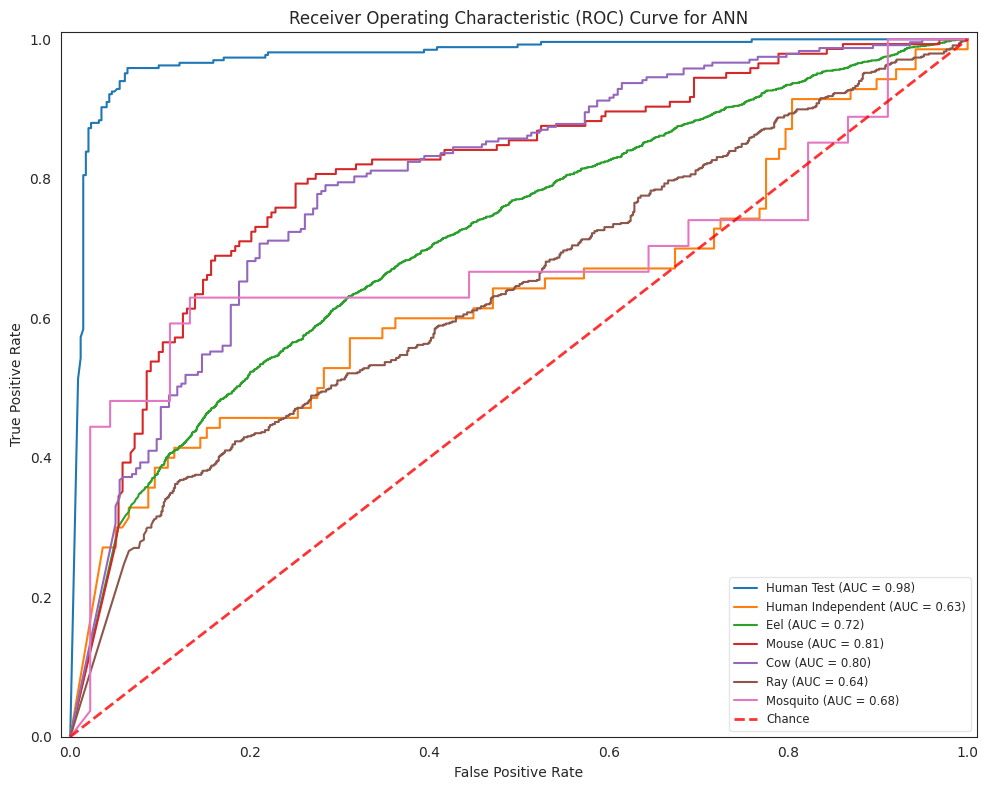

Evaluating dataset: Human Test
Evaluating model: CNN
20/20 [==============================] - 0s 4ms/step
Confusion Matrix - CNN:
[301  44]
[ 62 205]
Model: CNN
Accuracy: 0.826797385620915
Precision: 0.8232931726907631
Recall: 0.7677902621722846
F1 Score: 0.7945736434108528
ROC-AUC Score: 0.8945882863811538
Cohen's Kappa Score: 0.645170818154967
MCC Score: 0.646345177954393

Evaluating dataset: Human Independent
Evaluating model: CNN
7/7 [==============================] - 0s 20ms/step
Confusion Matrix - CNN:
[59 79]
[31 39]
Model: CNN
Accuracy: 0.47115384615384615
Precision: 0.3305084745762712
Recall: 0.5571428571428572
F1 Score: 0.41489361702127664
ROC-AUC Score: 0.5367494824016563
Cohen's Kappa Score: -0.013106624158696567
MCC Score: -0.014612041393107126

Evaluating dataset: Eel
Evaluating model: CNN
171/171 [==============================] - 1s 4ms/step
Confusion Matrix - CNN:
[2234 1141]
[ 907 1177]
Model: CNN
Accuracy: 0.624839714233376
Precision: 0.5077653149266609
Recall: 0.564

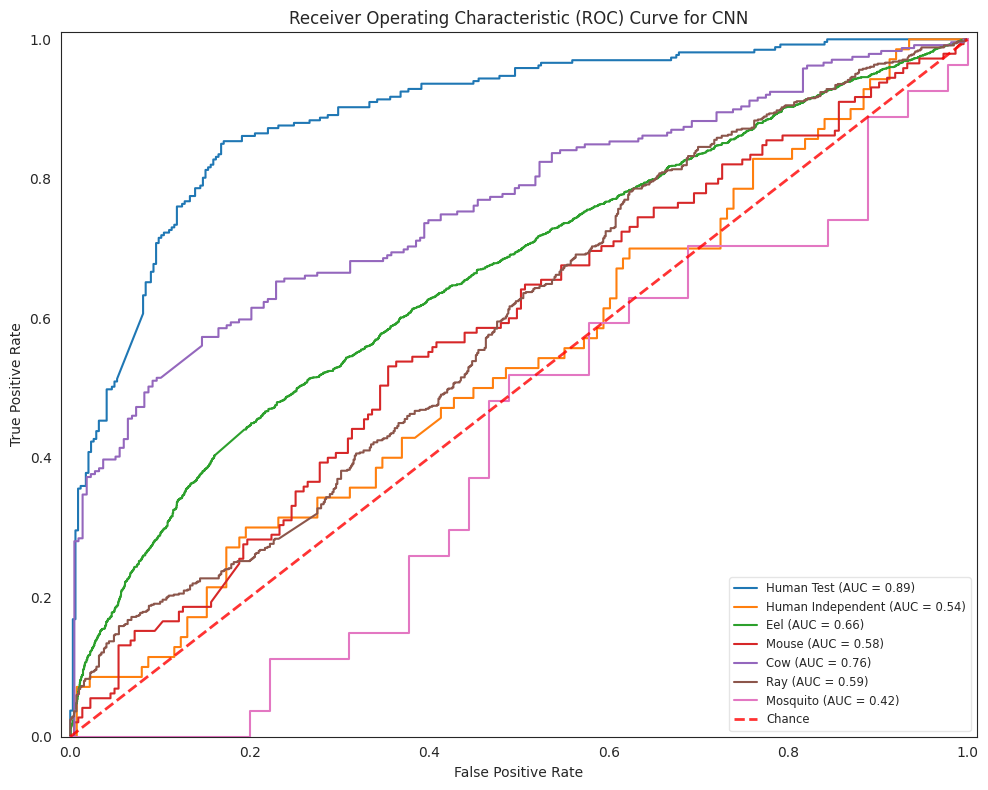

Evaluating dataset: Human Test
Evaluating model: LSTM
20/20 [==============================] - 0s 24ms/step
Confusion Matrix - LSTM:
[293  52]
[180  87]
Model: LSTM
Accuracy: 0.6209150326797386
Precision: 0.6258992805755396
Recall: 0.3258426966292135
F1 Score: 0.4285714285714286
ROC-AUC Score: 0.6979970688812897
Cohen's Kappa Score: 0.1851520264453702
MCC Score: 0.20728035438255638

Evaluating dataset: Human Independent
Evaluating model: LSTM
7/7 [==============================] - 0s 23ms/step
Confusion Matrix - LSTM:
[97 41]
[62  8]
Model: LSTM
Accuracy: 0.5048076923076923
Precision: 0.16326530612244897
Recall: 0.11428571428571428
F1 Score: 0.134453781512605
ROC-AUC Score: 0.492287784679089
Cohen's Kappa Score: -0.1974066621953945
MCC Score: -0.20356613633880624

Evaluating dataset: Eel
Evaluating model: LSTM
171/171 [==============================] - 4s 23ms/step
Confusion Matrix - LSTM:
[2848  527]
[1611  473]
Model: LSTM
Accuracy: 0.6083531782377725
Precision: 0.473
Recall: 0.22696

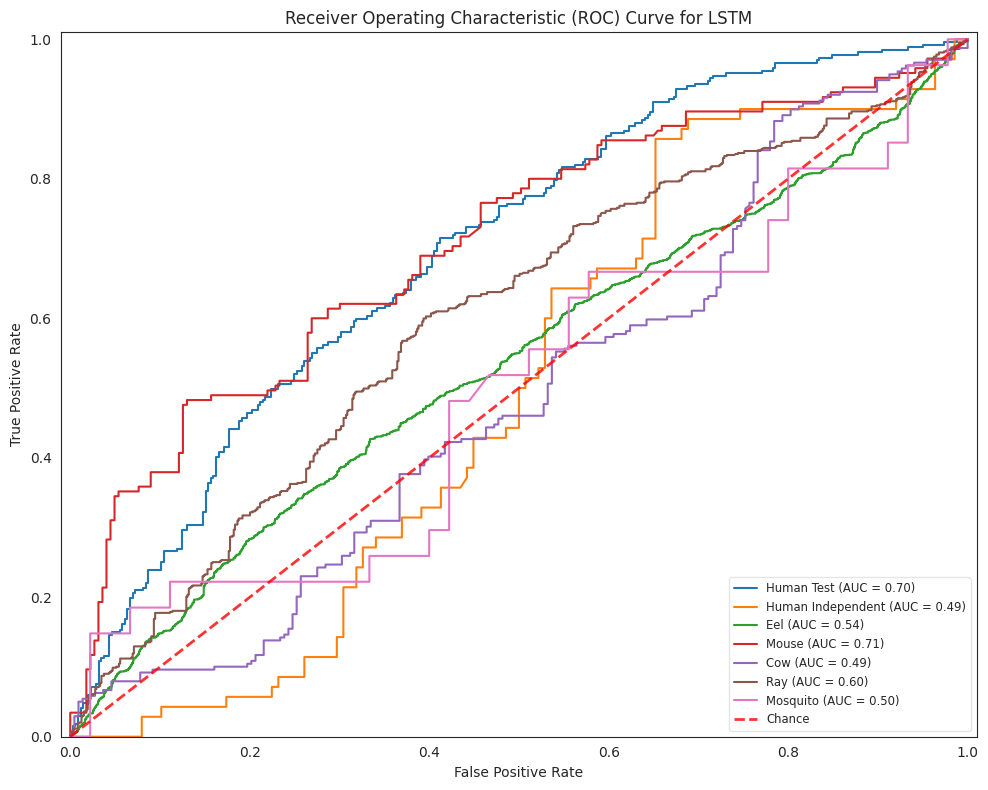

Evaluating dataset: Human Test
Evaluating model: GRU
20/20 [==============================] - 1s 26ms/step
Confusion Matrix - GRU:
[345   0]
[267   0]
Model: GRU
Accuracy: 0.5637254901960784
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5295011670194865
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Human Independent
Evaluating model: GRU
4/7 [================>.............] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 0s 25ms/step
Confusion Matrix - GRU:
[138   0]
[70  0]
Model: GRU
Accuracy: 0.6634615384615384
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5034679089026914
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Eel


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating model: GRU
171/171 [==============================] - 4s 23ms/step
Confusion Matrix - GRU:
[3375    0]
[2084    0]
Model: GRU
Accuracy: 0.6182450998351346
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.4819739816592023
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Mouse
Evaluating model: GRU
 4/12 [=========>....................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12/12 [==============================] - 0s 24ms/step
Confusion Matrix - GRU:
[223   0]
[145   0]
Model: GRU
Accuracy: 0.6059782608695652
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.47143961651461264
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Cow
Evaluating model: GRU
 4/15 [=======>......................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 0s 24ms/step
Confusion Matrix - GRU:
[218   0]
[239   0]
Model: GRU
Accuracy: 0.47702407002188185
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5034355686921806
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Ray
Evaluating model: GRU
 1/44 [..............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44/44 [==============================] - 1s 23ms/step
Confusion Matrix - GRU:
[719   0]
[687   0]
Model: GRU
Accuracy: 0.5113798008534851
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5150793698995654
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Mosquito
Evaluating model: GRU
3/3 [==============================] - 0s 23ms/step
Confusion Matrix - GRU:
[45  0]
[27  0]
Model: GRU
Accuracy: 0.625
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5938271604938271
Cohen's Kappa Score: 0.0
MCC Score: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


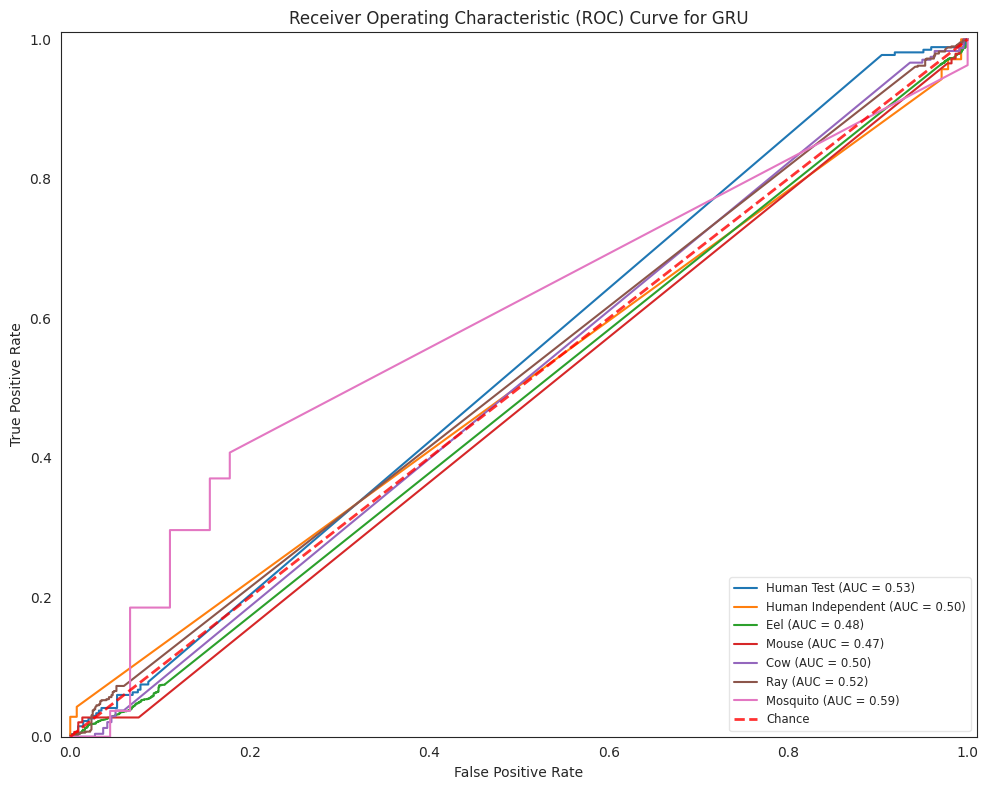

Evaluating dataset: Human Test
Evaluating model: Bi-LSTM
20/20 [==============================] - 1s 66ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix - Bi-LSTM:
[345   0]
[267   0]
Model: Bi-LSTM
Accuracy: 0.5637254901960784
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Human Independent
Evaluating model: Bi-LSTM
7/7 [==============================] - 0s 51ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix - Bi-LSTM:
[138   0]
[70  0]
Model: Bi-LSTM
Accuracy: 0.6634615384615384
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Eel
Evaluating model: Bi-LSTM
171/171 [==============================] - 8s 45ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix - Bi-LSTM:
[3375    0]
[2084    0]
Model: Bi-LSTM
Accuracy: 0.6182450998351346
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5002962962962962
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Mouse
Evaluating model: Bi-LSTM
12/12 [==============================] - 1s 71ms/step
Confusion Matrix - Bi-LSTM:
[223   0]
[145   0]
Model: Bi-LSTM
Accuracy: 0.6059782608695652
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.496551724137931
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Cow
Evaluating model: Bi-LSTM
 1/15 [=>............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 1s 65ms/step
Confusion Matrix - Bi-LSTM:
[218   0]
[239   0]
Model: Bi-LSTM
Accuracy: 0.47702407002188185
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5022935779816513
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Ray
Evaluating model: Bi-LSTM


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44/44 [==============================] - 2s 51ms/step
Confusion Matrix - Bi-LSTM:
[719   0]
[687   0]
Model: Bi-LSTM
Accuracy: 0.5113798008534851
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Mosquito
Evaluating model: Bi-LSTM
1/3 [=========>....................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 47ms/step
Confusion Matrix - Bi-LSTM:
[45  0]
[27  0]
Model: Bi-LSTM
Accuracy: 0.625
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


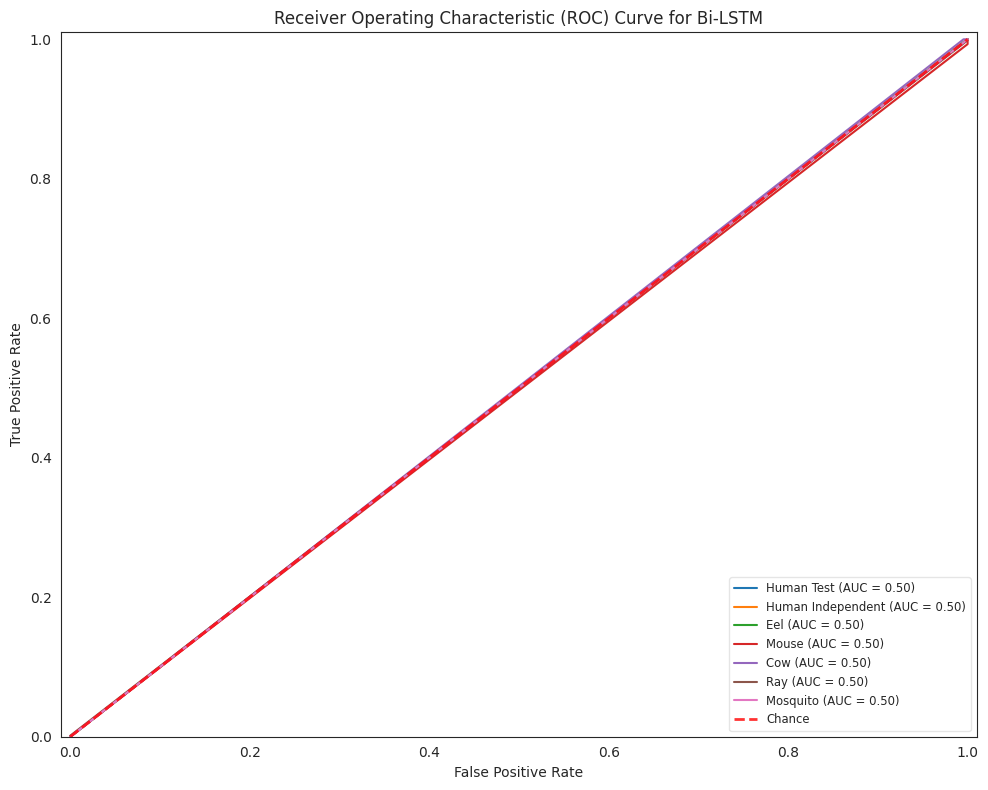

                                                                 ANN  \
Human Test         {'Accuracy': 0.9411764705882353, 'Precision': ...   
Human Independent  {'Accuracy': 0.6346153846153846, 'Precision': ...   
Eel                {'Accuracy': 0.6686206264883678, 'Precision': ...   
Mouse              {'Accuracy': 0.7608695652173914, 'Precision': ...   
Cow                {'Accuracy': 0.737417943107221, 'Precision': 0...   
Ray                {'Accuracy': 0.6002844950213371, 'Precision': ...   
Mosquito           {'Accuracy': 0.7083333333333334, 'Precision': ...   

                                                                 CNN  \
Human Test         {'Accuracy': 0.826797385620915, 'Precision': 0...   
Human Independent  {'Accuracy': 0.47115384615384615, 'Precision':...   
Eel                {'Accuracy': 0.624839714233376, 'Precision': 0...   
Mouse              {'Accuracy': 0.5842391304347826, 'Precision': ...   
Cow                {'Accuracy': 0.7045951859956237, 'Precision'

/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

# Define a function to print the confusion matrix
def print_confusion_matrix(confusion, model_name):
    print(f"Confusion Matrix - {model_name}:")
    for row in confusion:
        print(row)

# Define a function to plot ROC AUC curve
def plot_roc_auc(y_true, y_score, model_name, dataset_name):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{dataset_name} (AUC = {roc_auc:.2f})')

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
all_results = {}
confusion_matrices = {}

for model_name in models.keys():
    plt.figure(figsize=(10, 8))

    for dataset_name, dataset in datasets.items():
        print(f"Evaluating dataset: {dataset_name}")

        scaler = StandardScaler()
        X = scaler.fit_transform(dataset.X)
        y = dataset.y

        print(f"Evaluating model: {model_name}")

        # Reshape input data for RNN models
        if 'LSTM' in model_name or 'GRU' in model_name:
            X_rnn = X.reshape(X.shape[0], X.shape[1], 1)
        else:
            X_rnn = X

        model = models[model_name]
        y_pred_prob = model.predict(X_rnn)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred_prob[:, 1])
        cohen_kappa = cohen_kappa_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)

        # Calculate the confusion matrix
        confusion = confusion_matrix(y, y_pred)

        # Store confusion matrix
        confusion_matrices[(dataset_name, model_name)] = confusion

        # Print the confusion matrix as text
        print_confusion_matrix(confusion, model_name)

        # Print evaluation metrics
        print(f"Model: {model_name}")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print("ROC-AUC Score:", roc_auc)
        print("Cohen's Kappa Score:", cohen_kappa)
        print("MCC Score:", mcc)
        print()

        # Plot ROC-AUC curve
        plot_roc_auc(y, y_pred_prob[:, 1], model_name, dataset_name)

        # Store results
        if model_name not in all_results:
            all_results[model_name] = {}
        all_results[model_name][dataset_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc,
            'Cohen\'s Kappa': cohen_kappa,
            'MCC': mcc
        }

    # Plot settings
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.xlim([-0.01, 1.01])
    plt.ylim([0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc="lower right", fontsize='small', fancybox=True, framealpha=0.5)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f'roc_auc_curve_{model_name}.png')
    plt.show()
    plt.close()

# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(all_results)
print(results_df)

# Save results to Excel
results_df.to_excel('deep_learning_evaluation_results.xlsx', index=True)

# Save confusion matrices to a separate Excel file
with pd.ExcelWriter('confusion_matrices.xlsx') as writer:
    for (dataset_name, model_name), confusion_matrix in confusion_matrices.items():
        df_confusion = pd.DataFrame(confusion_matrix)
        df_confusion.to_excel(writer, sheet_name=f'{dataset_name}_{model_name}_confusion_matrix', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
for model_name, model in models.items():
    model_results = {}
    for dataset_name, dataset in datasets.items():
        print(f"Evaluating dataset: {dataset_name}")

        scaler = StandardScaler()
        X = scaler.fit_transform(dataset.X)
        y = dataset.y

        print(f"Evaluating model: {model_name}")

        # Reshape input data for RNN models
        if 'LSTM' in model_name or 'GRU' in model_name:
            X_rnn = X.reshape(X.shape[0], X.shape[1], 1)
        else:
            X_rnn = X

        y_pred_prob = model.predict(X_rnn)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred_prob[:, 1])
        cohen_kappa = cohen_kappa_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)

        # Store results
        model_results[dataset_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc,
            'Cohen\'s Kappa': cohen_kappa,
            'MCC': mcc
        }
    # Create a Pandas DataFrame from the results
    results_df = pd.DataFrame(model_results)

    # Save results to Excel
    results_df.to_excel(f'{model_name}_evaluation_results.xlsx', index=True)


Evaluating dataset: Human Test
Evaluating model: ANN
20/20 [==============================] - 0s 3ms/step
Evaluating dataset: Human Independent
Evaluating model: ANN
7/7 [==============================] - 0s 2ms/step
Evaluating dataset: Eel
Evaluating model: ANN
171/171 [==============================] - 0s 3ms/step
Evaluating dataset: Mouse
Evaluating model: ANN
12/12 [==============================] - 0s 3ms/step
Evaluating dataset: Cow
Evaluating model: ANN
15/15 [==============================] - 0s 2ms/step
Evaluating dataset: Ray
Evaluating model: ANN
44/44 [==============================] - 0s 2ms/step
Evaluating dataset: Mosquito
Evaluating model: ANN
3/3 [==============================] - 0s 3ms/step
Evaluating dataset: Human Test
Evaluating model: CNN
20/20 [==============================] - 0s 4ms/step
Evaluating dataset: Human Independent
Evaluating model: CNN
7/7 [==============================] - 0s 4ms/step
Evaluating dataset: Eel
Evaluating model: CNN
171/171 [=========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 0s 24ms/step
Evaluating dataset: Eel


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating model: GRU
171/171 [==============================] - 4s 23ms/step
Evaluating dataset: Mouse
Evaluating model: GRU
 4/12 [=========>....................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12/12 [==============================] - 0s 22ms/step
Evaluating dataset: Cow
Evaluating model: GRU
 3/15 [=====>........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 0s 23ms/step
Evaluating dataset: Ray
Evaluating model: GRU
 1/44 [..............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44/44 [==============================] - 1s 31ms/step
Evaluating dataset: Mosquito
Evaluating model: GRU
3/3 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 37ms/step
Evaluating dataset: Human Test
Evaluating model: Bi-LSTM
 1/20 [>.............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20/20 [==============================] - 1s 47ms/step
Evaluating dataset: Human Independent
Evaluating model: Bi-LSTM
1/7 [===>..........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 0s 44ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating dataset: Eel
Evaluating model: Bi-LSTM
171/171 [==============================] - 8s 44ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating dataset: Mouse
Evaluating model: Bi-LSTM
12/12 [==============================] - 1s 51ms/step
Evaluating dataset: Cow
Evaluating model: Bi-LSTM
 1/15 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 1s 43ms/step
Evaluating dataset: Ray
Evaluating model: Bi-LSTM
 1/44 [..............................] - ETA: 2s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44/44 [==============================] - 2s 45ms/step
Evaluating dataset: Mosquito
Evaluating model: Bi-LSTM
3/3 [==============================] - 0s 44ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
for model_name, model in models.items():
  model.save(f'{model_name}_model.h5')

## References
* Rogers, D., & Hahn, M. (2010). Extended-Connectivity Fingerprints. Journal of Chemical Information and Modeling, 50(5), 742–754. https://doi.org/10.1021/ci100050t
* https://colab.research.google.com/github/deepchem/deepchem/blob/master/examples/tutorials/Introduction_to_Model_Interpretability.ipynb
*Ramsundar, B., Eastman, P., Walters, P., Pande, V., Leswing, K., & Wu, Z. (2019). Deep Learning for the Life Sciences. O’Reilly Media. https://www.amazon.com/Deep-Learning-Life-Sciences-Microscopy/dp/1492039837
*   Vignaux, P. A., Lane, T. R., Urbina, F., Gerlach, J., Puhl, A. C., Snyder, S. H., & Ekins, S. (2023). Validation of Acetylcholinesterase Inhibition Machine Learning Models for Multiple Species. Chemical Research in Toxicology, 36(2), 188–201. https://doi.org/10.1021/acs.chemrestox.2c00283